# SWMAL Exercise 1 Intro


 

### Setup
#comment
This is the setup we where allowed to keep. Please skip to Qa to find the start of the journal

In [2]:
#comment

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [4]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#
! dir
! ls

print("\nOK")

/bin/bash: dir: command not found


Figs                      demo.ipynb                modules_and_classes.ipynb
datasets                  intro.ipynb
datasets.zip              lesson01.pdf

OK


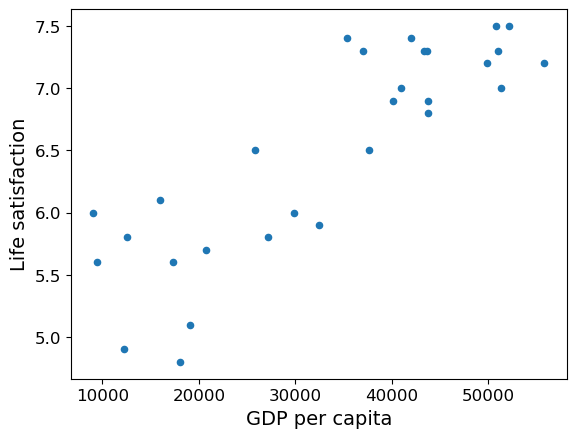

[[5.96242338]]
OK


In [5]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)



# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]


print("OK")

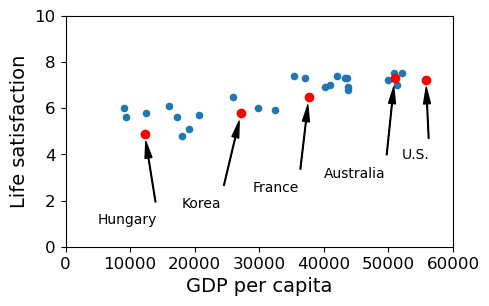

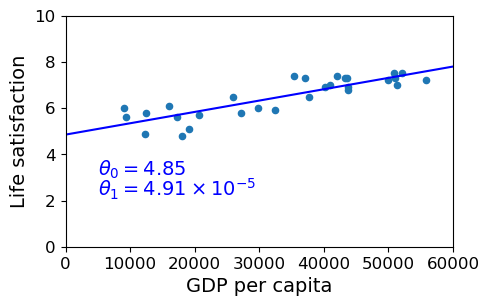

OK


In [6]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Qa: The $\theta$ parameters and the $R^2$ Score
We will be using the $\theta$ parameters from the model declared above. 
To use the $\theta$ parameters we must extract them from the model. If we want to get the intercept and coefficient params, also called $\theta_0$ and $\theta_1$. For a given model, it is possible to extract $\theta_0$ and $\theta_1$ with following python attributes.


In [7]:
theta0 = model.intercept_  # Intercept
theta1 = model.coef_[0]   

print(f"{theta0}")
print(f"{theta1}")

[4.8530528]
[4.91154459e-05]


In [8]:
r_sq = model.score(X,y)

print(f"{r_sq}")

0.7344414355437031


The $R^2$ score, that is showed, is the coefficient of determination. It determines the fitness of the data to the linear model. It has a max value of 1, which indicates that the data match perfectly to the linear model. 
If you have a coefficient of determination below 0, it indicates that the model that is in use in incorrect.
Therefore the values for $R^2~$ range from minus infinity to 1

It is best to have a high score, as to the fact that the max value 1 tells us that the data fit perfectly to the linear model. 

### Qb) Using k-Nearest Neighbors

In this exercise we will be using the K-nearest neighbors to train the model.

K-nearest is a supervised learning classifier. It uses the amount k nearest data points in the training dataset it has while the linear regression model doesn't use anything when instantiated. 
The default value for K-nearest model is 5 if you don't change it. The method for calling fit and predict both for K-nearest model and linear regression model are the same. 

The score of the model can be compared in the sense that they provide information on how well the model performs. The score will not have a precise and definite saying about which model is best, but if one of the models are almost zero or less compared to another model is are almost 1, we can say that the model closest to 1 is a better model in this thought experiment. If you want to compare them you will also have to look at other different evaluation types like F1-Score. 

In [9]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In the cell below we start with preparing the data and visualizing it. 
We use the K-nearest neighbor regressor from sklearn which can be found: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

X.shape= (29, 1)
y.shape= (29, 1)


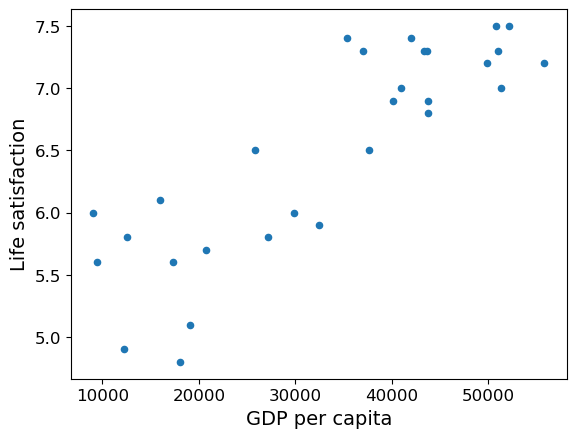

K-nearstneighbor prediction for Cypress: [[5.76666667]]
Linearregression prediction for Cypress: [[5.96242338]]


In [10]:
# Import the KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
#Prepare the data

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)


# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

plt.show()

# Instantiate 
knn = KNeighborsRegressor(n_neighbors=3)

# Train model
knn.fit(X, y)

# Predict and print the knn = 5.766667
print(f"K-nearstneighbor prediction for Cypress: {knn.predict(X_new)}")# knn = ..
print(f"Linearregression prediction for Cypress: {lin1.predict(X_new)}")

As you can see the prediction for the k-nearest neighbor and linear regression are close to each other. However, they are not the same. This is due to the fact that they are fundamentally different algorithms.

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

In this chapter we will look into the tuning of parameter for k-nearest neighbors. By changing the parameter we will look into how it works and do a santity check. We will answer why the score closed to 1 does not mean, that the k-nearest nieghbors is the right esimater for the job. 

The problem with having a k-nearest neighbor produces a score that is 1. It makes a prediction based on the single closest value and that can cause overfitting. Or as you can see on the picture where N=1, the line does follow the rest of the data and is overfitting.

It is also a problem if the k-nearest neighbor gets too large, because the data does not follow the data as you can observe below where K=20.

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

1 nearest neighbour score: 1.0
3 nearest neighbour score: 0.8525732853499179
10 nearest neighbour score: 0.7833080605150065


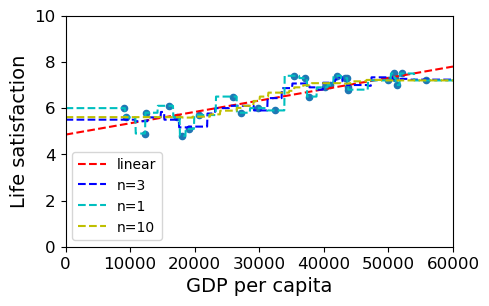

In [11]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M) 

# use plt.plot to plot x-y into the sample_data plot..
# Plot linear regression
plt.plot(m, y_pred_lin, "r--", label="linear")

# Plot Neighbor set to 3
plt.plot(m, y_pred_knn, "b--", label="n=3")

# Import the KNeighbor regressor
from sklearn.neighbors import KNeighborsRegressor

# Neighbor set to 1
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X, y)
y_pred_knn1 = knn1.predict(M)
plt.plot(m, y_pred_knn1, "c--", label="n=1")

# Neighbor set to 10
knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X, y)
y_pred_knn2 = knn2.predict(M)
plt.plot(m, y_pred_knn2, "y--", label="n=10")

# Legends
plt.legend()

# Print 
print(f"1 nearest neighbour score: {knn1.score(X, y)}")
print(f"3 nearest neighbour score: {knn.score(X, y)}")
print(f"10 nearest neighbour score: {knn2.score(X, y)}")

Above you can both see the score and the plotting of the 3 different amounts of neighbors. The K-nearest neighbor with 1 neighbor has a score 1, and follows the data complete, which is overfitting. The n=3 is better because it follows the flow, but not as much and are less change of overfitting. Looking at n=10 the line is much smoother, but this will also mean that there is a loss of detail. 
It is difficult to tell which model are the best one from the diagram. The goal is to have a balance between having a small enough k to capture local patterns and but also large enough to reduce noise.

### Qd) Trying out a Neural Network

We are going to try to use the neural network. We are using the Multi-Layer Perceptron (MLP) for regression. We find the MLPregressor here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

OBS. Each run of the column below produces a different outcome, because we make a new MPLRegressor and training again.  

In [24]:
from sklearn.neural_network import MLPRegressor;

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True);

mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M)

Iteration 1, loss = 103973.70805067
Iteration 2, loss = 94453.76574481
Iteration 3, loss = 85404.46329600
Iteration 4, loss = 76833.18742100
Iteration 5, loss = 68745.92120590
Iteration 6, loss = 61147.09257150
Iteration 7, loss = 54039.42244438
Iteration 8, loss = 47423.77504388
Iteration 9, loss = 41299.01321714
Iteration 10, loss = 35661.86233206
Iteration 11, loss = 30506.78685617
Iteration 12, loss = 25825.88438528
Iteration 13, loss = 21608.80250166
Iteration 14, loss = 17842.68438490
Iteration 15, loss = 14512.14950113
Iteration 16, loss = 11599.31587194
Iteration 17, loss = 9083.87027414
Iteration 18, loss = 6943.19213986
Iteration 19, loss = 5152.53581267
Iteration 20, loss = 3685.27408974
Iteration 21, loss = 2513.20360678
Iteration 22, loss = 1606.90963009
Iteration 23, loss = 936.18432471
Iteration 24, loss = 470.48878361
Iteration 25, loss = 179.44534259
Iteration 26, loss = 33.34335407
Iteration 27, loss = 3.63906801
Iteration 28, loss = 63.42895392
Iteration 29, loss = 1

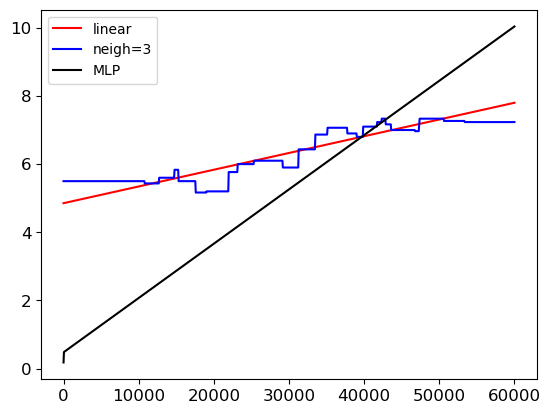

In [23]:
plt.plot(m, y_pred_lin, "r", label="linear")
plt.plot(m, y_pred_knn, "b", label="neigh=3")
plt.plot(m, y_pred_mlp, "k", label="MLP")
plt.legend();

In [14]:
print(f"MLP score:  {mlp.score(X, y)}")
print(f"K-nearstneighbor=3 score: {knn.score(X, y)}")
print(f"Linearregression score: {lin1.score(X, y)}")

MLP score:  -3.6741440524092503
K-nearstneighbor=3 score: 0.8525732853499179
Linearregression score: 0.7344414355437031


The score for the MLP differs each time you train the model, sometimes the score is -25.42, -3.85 or other values. As we can observe both from the score and the plot the Multi-Layer Perception from the Neural Network does not fit the data well for iterations up till 10000. The score can again be used as a indicator of the fitness of the model. 
As we can see the data-set for the training does not scale well with the MLP without prescaling. The next chapter we will use the prescaling. 

# SWMAL Exercise

## Python Basics

### Modules and Packages in Python

#### Qa Load and test the `libitmal` module
This chapter will decribe how to load and test modules. Firstly you have to import sys and os for being allowed to work with the  system and the operation system. Here you will load the gitmal package. The import can be done a few different ways and in the example below the expanduser will be used. You can see below that we print of the path and the files.

In [1]:
import sys,os
sys.path.append(os.path.expanduser('../'))

from libitmal import utils as itmalutils
print(dir(itmalutils))
print(itmalutils.__file__)
itmalutils.TestAll()


['AssertInRange', 'CheckFloat', 'DToXy', 'GenerateConfusionMatrix', 'GenerateResults', 'InRange', 'Iterable', 'ListToMatrix', 'ListToVector', 'PrintMatrix', 'ResetRandom', 'ShowResult', 'TEST', 'TestAll', 'TestCheckFloat', 'TestPrintMatrix', 'TestVarName', 'VarName', 'XyToD', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'ctxlib', 'inf', 'inspect', 'isFloat', 'isList', 'isNumpyArray', 'nan', 'np', 'random', 're', 'sklearn']
c:\Users\Bjark\source\repos\MAL\mal12\L01\..\libitmal\utils.py
TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


#### Qb Create your own module, with some functions, and test it

Here we create our own module. The module is places inside the mal12, which is our github folder. This will make it easy to collaborate and will be pushed every time changed are made. Creating our module is done by creating two files. The "__init__.py" and "utils.py" 

In [5]:
import sys,os
import numpy as np
sys.path.append(os.path.expanduser('~/MAL/mal12'))

from UtilsMAL import utils as myUtils
print(dir(myUtils))
print(myUtils.__file__)

L1= myUtils.L1

dummy = np.array([3,4,5])
print(f"The answer for the L1: {L1(dummy)}")

['L1', 'L2', 'L2Dot', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'checkArraySize', 'checkArraySizeCoantainsElements', 'if_windoes', 'np', 'os']
c:\Users\Bjark\source\repos\MAL\mal12\L01\..\UtilsMAL\utils.py
The answer for the L1: 12.0


#### Qc How do you 'recompile' a module?

If you are using the Visual Studie Code the reloading works out-of-the-box. However, this is not the same for Jupyter Notebook. In Jupyter you have to either use the importlib or use a smart syntax for autoreload. The information is found at: [Jupyter Notebook Reload Module: A Comprehensive Guide](https://saturncloud.io/blog/jupyter-notebook-reload-module-a-comprehensive-guide/). Below you can see the different ways to reload. For autoreaload, when the parameter is set to 2 it load on every reload.

In [3]:
import importlib
importlib.reload(myUtils)

# Auto reload
%load_ext autoreload
%autoreload 2

#### [OPTIONAL] Qd Write a Howto on Python Modules a Packages

Write a short description of how to use modules in Python (notes on modules path, import directives, directory structure, etc.)

In this chapter we will look into creating our own library. Firstly create a new folder and name is UtilsMal. Inside this  Now will create two files. Them first file called "__init__.py" and the second utils


### Classes in Python

#### Qe Extend the class with some public and private functions and member variables

For creating a class in python you will often see the keyword self. It is the representation of the instance of the class. The "self" keyword is be renamed, but the convention is self. If you forget the "self" keyword the class will be static. A static class are not allowed to call the members of the class or make a instance of the class. In the codesnippets below you can observe the `def myfun():` where self is forgotten. IF you run the code you will get the error: `TypeError: MyClass.myfun() takes 0 positional arguments but 1 was given`. The error is because a instance `myobjectx`  of MyClass is made and it attempt to call the `myobjectx.myfun()` Python will raise a the error, because it is excepting one argument "self". 

In [15]:
class MyClass:
    def myfun(self):
        myvar = "blah" # NOTE: a per class-instance variable.
        print(f"This is a message inside the class, myvar={myvar}.")

myobjectx = MyClass()
print(myobjectx.myfun())


This is a message inside the class, myvar=blah.
None


Member are public when there is non underscore before the variable. If there are one underscore the member are protected. Private if two underscores. The function are private if you use a single underscore as a prefix to their name. 

#### Qf Extend the class with a Constructor

The constructor in Python is defined using the `__init__` method. The the constructor  take the parameter `self` and can be add more to parameter if needed. If you dont want a class the need a contructor, you can create a static class. The destructor in Python is ofte referred as `__del__` or `__del1__`. The destructor is used to define behavior that occurs when an object is about to be destroyed or garbage collected.   

In [16]:
class NewClass:
    def fun():
        return ("Static instance"); # private instance attribute

print(NewClass.fun());

Static instance


In [17]:
class MyClass:
    def __init__(self, text):
        self.__myvar=text  # private instance attribute

    def myfun(self, text):
        vs = text
        print(f"This is a message inside the class, myvar={vs}.")

myobjectx = MyClass("text")

print(myobjectx.myfun("nontext"))

This is a message inside the class, myvar=nontext.
None


#### Qg Extend the class with a to-string function

This chapter will show how to make a `tostring()` function in Python. Call the function `__str__`, because the standard way to do it in Python. We call the funcion inside the print function. 


In [18]:
class MyClass:
    def __init__(self, text):
        self.__myvar=text 
    
    def __str__(self):
        return f"MyClass instance with value: {self.__myvar}"

myobjectx = MyClass("text")
print(myobjectx.__str__())

MyClass instance with value: text


# SWMAL Exercise

## Mathematical Foundation

### Vector and matrix representation in python


$$
    \newcommand\rem[1]{}
    \rem{SWMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\scriptsize #1}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\text{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\text{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\text{\scriptsize test}}}
    \def\powtrain{\pown{\text{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
$$

This exercise is about vector and matrix representation in Python. Firstly, there will be showed how to implement an array in python. Secondly, the $\norm{1}$ and $\norm{2}$ will be implemented without using `sqrt` or other mathmatical operators from math the library. 

#### Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$


For using the Python in the course we will have to get familiar with Python and the libraries.

In this chapter we will show how you can implement an array using numpy. You can either create the whole array at once or you can use the append function. The append take two arrays and put them together in a new array. Another function is the vstack, where the function vertically stack each element. 

In [2]:
import numpy as np
y = np.array([1, 2, 3, 4]) # NOTE:  you'll need this later

# Default method
X = np.array([[1, 2, 3],[4, 2, 1], [3, 8, 5], [-9, -1, 0]])

# print the full matrix
print(f"X = \n{X}")

# use the vstack
np.vstack(([1, 2, 3],[4, 2, 1], [3, 8, 5], [-9, -1, 0]))



# Use append 
q= np.array([[1, 2, 3],[4, 2, 1]] ) # NOTE:  you'll need this later
q = np.append(q, [[3, 8, 5], [-9, -1, 0]],axis = 0)

# print the full matrix
print(f"q = \n{q}")

X = 
[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]
q = 
[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


### Norms, metrics or distances

#### Qb Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.

Here we will ilustrate how to use the norms, metrices or distances. The first thing you will notice below is two functions for error validation, that belongs to an exercise that will be decribed later on. The test of the validation is done up here, we will explain alot more later on. Just below the validation function, you can observe the L1, L2 and L2Dot. The L1 is given the distance between two vectors. Therefore, it takes the absolute value and sum all numbers together.


$$
    \ar{ll}{      
          \text{d}(\bx,\by) &= ||\bx-\by||_2\\
                     &= \left( \sum_{i=1}^n \left| x_{i}-y_{i} \right|^2 \right)^{1/2}
    }
$$ 

 The L2 is the Eucalidian distance or norm for a vector. You can define it through a sum operation or a dot operation. Dot operation is vector multiplied with itself

$$
    \norm{2}:~~ ||\bx||_2 = \left( \sum_{i=1}^{n} |x_i|^2 \right)^{1/2}\\
$$ 



In [2]:
import math

def checkArraySize(X):
    assert X.shape[0]>=0
    if not X.ndim==1:
        raise Exception("Array size needs to bigger than 1 dimision")

def L1(X):
    checkArraySize(X)
    return sum((Xi**2)**0.5 for Xi in X) 


def L2(X):
    checkArraySize(X)
    return sum((Xi*Xi) for Xi in X) **(1/2)

def L2Dot(X):
    return np.sqrt(np.dot(X,X))


# Test the function with the following vectors
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

# comment-in once your L2Dot fun is ready...
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


## The cost function, $J$
### Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

We will here show how to call the function Root Mean Square Error (RMSE), by using the $\bX$ matrix and $\by$ from Qa. 
There will be implemented a dummy hypothesis function. With this function we will be taking the first column of $\bX$ as its 'prediction'

$$
    h\st{dummy}(\bX) = \bX(:,0)
$$

We will be calling the '''L2''' function that has been implemented internally in RMSE


In [3]:
def RMSE(X,y):
    dif_array = X - y
    checkArraySize(dif_array)  
    return (L2(dif_array))*0.5
        
# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


### MAE

#### Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

As we just created a function for the RMSE, we also want to create a function for the Mean Absolute Error (MAE). The MAE will internally use the $\norm{1}$

$$
    \ar{rl}{
        \text{MSE} &= \frac{1}{n} \sum_{i=1}^{n} (\hat{Z}_i-Z_i)^2 = \frac{1}{n} SS\\
        \text{RMSE} &= \sqrt{\text{MSE}}\
    }
$$
  

In [4]:
def MAE(X,y):
    checkArraySize(X)
    L1(X-y)
    return L1(X-y)/X.size

# Calls your MAE function:
r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


## Pythonic Code

#### Qe Robust Code 

We have added error checking code (asserts or exceptions), that checks for right $\hat\by$-$\by$ sizes of the MSE and MAE functions.

We have also error checking to all the previously tested L2() and L1() functions. as can be seen in the following code block 

In [2]:
def checkArraySize(X):
    assert X.shape[0]>=0
    if not X.ndim==1:
        raise Exception("Array size needs to bigger than 1 dimision")

def L1(X):
    checkArraySize(X)
    return sum((Xi**2)**0.5 for Xi in X) 


def L2(X):
    checkArraySize(X)
    return sum((Xi*Xi) for Xi in X) **(1/2)

def RMSE(X,y):
    dif_array = X - y
    checkArraySize(dif_array)  
    return (L2(dif_array))*0.5

def MAE(X,y):
    checkArraySize(X)
    L1(X-y)
    return L1(X-y)/X.size

### Qf Conclusion


In this exercise we have implemented the L1 and L2 distance functions. We have also manually implemented the RMSE and MAE functions without the use of built-in function. We have tested the functions with the given vectors and the results are as expected. This is to learn and become familiar with the formulars and functions. And get a better understanding the math behind the methods often used in Machine Learning. Lastly, we also have learned how to check if the functionality is correct in the functions by adding error checking in our python code.

# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

In this exercise we will working with the MNIST data-set and reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data.

#### Qa  Load and display the MNIST data

We will fetch the MNIST data with a `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. 

Two functions are created. One to fetch the data-set and one to plot a single digit. 

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of samples: 70000
Label of the digit: 4


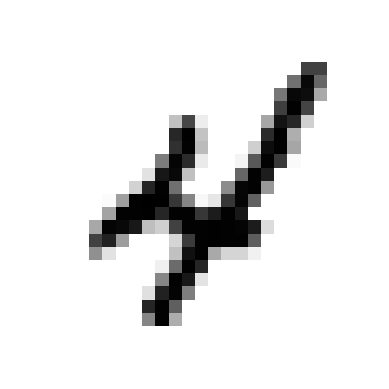

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

# Function to fetch the MNIST dataset
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
    return X,y


# Function to plot a digit
%matplotlib inline
def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

# Fetches X and y
X,y = MNIST_GetDataSet()

#Convert to [0;1] via scaling
X = X / 255.

#Check if data is loaded
print("Number of samples:", len(X))


digit_to_plot = X[9]  # The index is 9 for the 10th digit (0-based index)

#Check what number the image is representing
print("Label of the digit:", y[9])

MNIST_PlotDigit(digit_to_plot)


As we can see, a random digit is chosen (9). The image is shown and the y_true is 4.

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier
In this section we create a train-test data-set for MNIST and use the `SGDClassifier` as done in [HOML].

We split the data and run the fit-predict for the classifier using the MNIST data.
We will try to predict and identify one-digit. In this example we will try to detect if the image shows the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and non-5.
We will also see if there are any missclassified. 


X.shape=(70000, 784)


Predicted Label: False


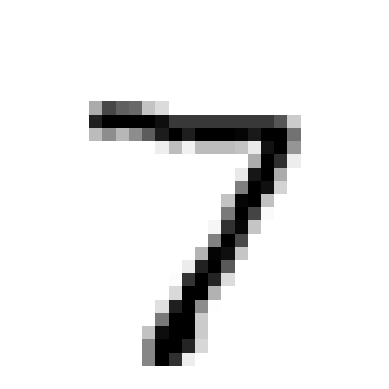

Predicted Label: False


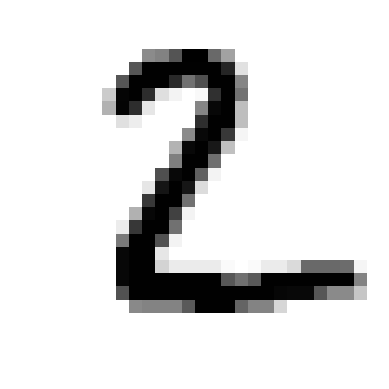

Predicted Label: False


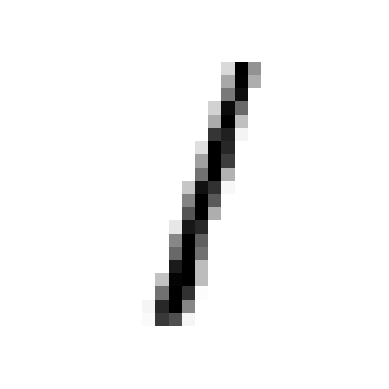

In [2]:
# TODO: add your code here..
import numpy as np
from sklearn.linear_model import SGDClassifier

#reshapes X to 2D array if not already
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Create binary target variable y_train_5 with the digit '5' as true
y_train_5 = (y_train == '5')   # True for all 5s, False for all other digits
# Create binary target variable for the testing set
y_test_5  = (y_test == '5')

# Create a SGDClassifier which will classify if a digit is a 5 or not
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier using the training data
sgd_clf.fit(X_train, y_train_5)

y_pred = sgd_clf.predict(X_test)

classified_numbers = np.where(y_pred == y_test_5)[0]

for number in classified_numbers[:3]:
    MNIST_PlotDigit(X_test[number])
    # Predict if the digit is a 5 or not
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")
    plt.show()


Given a loop that iterates through the first 3 instances where y_pred = y_test_5 (correctly classified numbers), we see that the predicted labels are consistent with images

Predicted Label: False


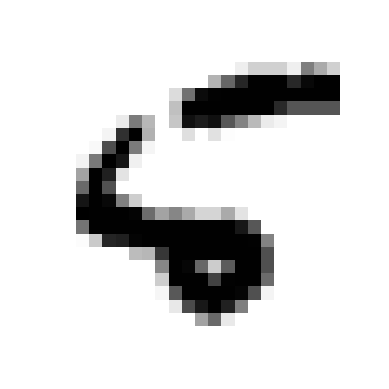

Predicted Label: False


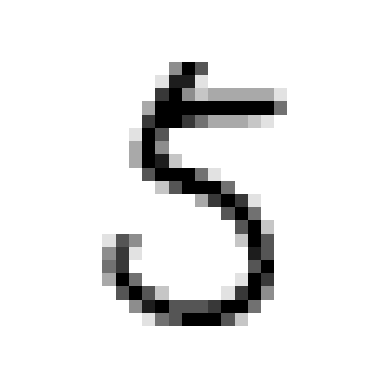

Predicted Label: False


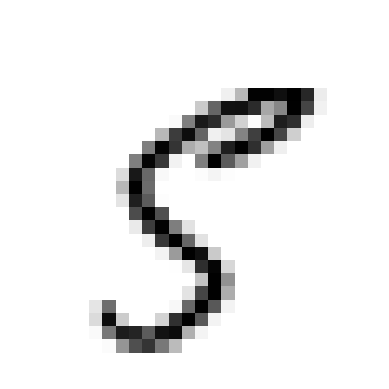

In [3]:
# Find misclassified instances
misclassified_numbers = np.where(y_pred != y_test_5)[0]
classified_numbers = np.where(y_pred == y_test_5)[0]

for number in misclassified_numbers[:3]:
    MNIST_PlotDigit(X_test[number])
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")

    plt.show()


In the same way, we identified some digits that were missclassified. It seems that it is not always precise. 

#### Qc Implement a dummy binary classifier

In this section we try to create a dummy classifier that just classifies every single image in class of the majority, which in this case is the non-5 class.
We call the fit-predict on our dummy class and extract the accuract score from the test data.

In [4]:

from sklearn.metrics import accuracy_score
import numpy as np

class DummyClassifier():
    def fit(self, X, y):
        # does not require any training, only memorizes the unique classes in y.
        self.classes_ = np.unique(y)
        self.dummy_class_ = np.argmax(np.bincount(y))  # Select the most frequent class as the dummy class
        return self

    def predict(self, X):
        # Returns array of the same length as X with the dummy class label
        return np.full(X.shape[0], fill_value=self.dummy_class_)


dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5) #trains the dummy classifier. Does not do anything
y_pred = dummy_clf.predict(X_test)
print(any(y_pred)) #predicts if any of the digits is a 5, gives a False

accuracy_score(y_test_5, y_pred)
#91% accuracy, just like in HOML


False


0.9108

With the dummy class every digit is a non-5. 
When we extract the accuracy score we get the same score as in HOML. 

### Qd Conclusion

As seen in the exercise we can use the SGDClassifier to train our data-set from MNIST. Through the exercise we can conclude that the train and test fits and has some correct predictions and some incorrect predictions. 
When testing the performance measures for the classifier it is a bit tricky to evaluate. We see that we get a 91% accuracy score for our DummyClassifier, which only spits a false out for every digit. But because the majority for the digits are non-5 (90% of them), this will then be our score. In this case, the accuracy score does not represent how good/fit our model is at all. We can therefore conclude, that it is not always preferred so use accuracy to define the performance measures when dealing with classifiers. Especially not, in data-sets where some classes are much more frequent than others. 




# SWMAL Exercise Performance metrics
In this exercise we will take a look at various ways to evaluate your algorithm using performance metrics. We will do this be recreating some of the well known metric formulas in python functions, and comparing them to the version found in the Sklearn.metrics library. These functions will then be tested on the algorithms from the dummy classifier exercise.

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

The following codebit is copied from the dummy classifier exercise, and will therefore not be described further.


In [15]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np



# Function to fetch the MNIST dataset
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
    return X,y
# Fetches X and y
X,y = MNIST_GetDataSet()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Create binary target variable y_train_5 with the digit '5' as true
y_train_5 = (y_train == '5')   # True for all 5s, False for all other digits
# Create binary target variable for the testing set
y_test_5  = (y_test == '5')

# Create a SGDClassifier which will classify if a digit is a 5 or not
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier using the training data
sgd_clf.fit(X_train, y_train_5)
#Convert to [0;1] via scaling
X = X / 255.
y_pred_sdg = sgd_clf.predict(X_test)


#Check if data is loaded

class DummyClassifier():
    def fit(self, X, y):
        # does not require any training, only memorizes the unique classes in y.
        self.classes_ = np.unique(y)
        self.dummy_class_ = np.argmax(np.bincount(y))  # Select the most frequent class as the dummy class
        return self

    def predict(self, X):
        # Returns array of the same length as X with the dummy class label
        return np.full(X.shape[0], fill_value=self.dummy_class_)


dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
y_pred_dummy = dummy_clf.predict(X_test)



c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### Qa Implement the Accuracy function and test it on the MNIST data.

an accuracy function will be created called MyAccuracy. It will return how many elements where predicted correctly. Furthermore a test function will be created. This function will use both the selfmade function and the sklearn version for validation. The testfunction will then be used on a simple example, the sdg and the dummy.

In [9]:
# TODO: Qa...
from sklearn.metrics import accuracy_score


def MyAccuracy(y_true, y_pred):
    if len(y_true)==0 or len(y_pred)==0:
        return 0
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(y_true)


    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

print("\nTestAccuracy() simple example:")
TestAccuracy([1,2,3,4], [1,2,3,3])

print("\nTestAccuracy() on sdg:")
TestAccuracy(y_test_5, y_pred_sdg)
print("\nTestAccuracy() on dummy:")
TestAccuracy(y_test_5, y_pred_dummy)

#    # do some numerical comparison here, like
#    #  if fabs(a0-a1)<eps then ..


TestAccuracy() simple example:

my a          =0.75
scikit-learn a=0.75

TestAccuracy() on sdg:

my a          =0.9492
scikit-learn a=0.9492

TestAccuracy() on dummy:

my a          =0.9108
scikit-learn a=0.9108


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

In the following section a function and test function is created in the same way as with the previous function from Qa. This is done for the precision-, recall- and F1-score respectively.  

In [10]:
# TODO: Qb..
import sklearn.metrics as metrics
def MyPrecision(y_true, y_pred):
    #predicted condition positive. All the predicted trues
    pcp = [item for item in y_pred if item == True]
    if len(pcp)==0:
        return 0
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(pcp)

def TestPrecision(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    p0=MyPrecision(y_true, y_pred)
    p1=metrics.precision_score(y_true, y_pred)

    print(f"\nmy p        ={p0}")
    print(f"scikit-learn p={p1}")

print("\nTestPrecision() simple example:")
TestPrecision([True,True,False,True], [True,True,True,False])
print("\nTestPrecision() on sdg:")
TestPrecision(y_test_5, y_pred_sdg)
print("\nTestPrecision() on dummy:")
TestPrecision(y_test_5, y_pred_dummy)




    



TestPrecision() simple example:

my p        =0.6666666666666666
scikit-learn p=0.6666666666666666

TestPrecision() on sdg:

my p        =0.6618887015177066
scikit-learn p=0.6618887015177066

TestPrecision() on dummy:

my p        =0
scikit-learn p=0.0


c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the precision metric can be used to identify the ratio between true positives and false positives. We see in the simple example that the methods filter out the predicted false, and just evaluates the 3 trues. This results in a score of 66% since one is a false positive. By using it on the data from the dummy exercise we furthermore see that the dummy get 0% because it only guesses false and the SDG get about 2/3. This means that about 1/3 of the numbers the algorithm thinks is a five actually arent a 5. In the real world this would be horrible if it fx was used to convict crimminals where you are innocent until proven guilty.

In [11]:
def MyRecall(y_true, y_pred):
    #condition positive
    cp = [item for item in y_true if item == True]
    if len(cp)==0:
        return 0
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(cp)

def TestRecall(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    r0=MyRecall(y_true, y_pred)
    r1=metrics.recall_score(y_true, y_pred)

    print(f"\nmy r        ={r0}")
    print(f"scikit-learn r={r1}")

print("\nTestRecall() simple example:")
TestRecall([True,True,True,True], [True,True,True,False])
print("\nTestRecall() on sdg:")
TestRecall(y_test_5, y_pred_sdg)
print("\nTestRecall() on dummy:")
TestRecall(y_test_5, y_pred_dummy)


TestRecall() simple example:

my r        =0.75
scikit-learn r=0.75

TestRecall() on sdg:

my r        =0.8800448430493274
scikit-learn r=0.8800448430493274

TestRecall() on dummy:

my r        =0.0
scikit-learn r=0.0


The recall metric tells us about the ratio between true positives and false negatives. Through this metric we can observe how many positives fall through and therefore aren't noticed by the algorithm. 
The results show us that the sdg-is quite good at finding the 5's very few 5's slip through the algorithm even though it also identifies some numbers as 5's that arent 5's.
In the real world it would be important in fx sickness detection where it is important to find and treat all the cases and it is probably fine if a a few false positives are sent through further investigation.

In [12]:
def MyF1Score(y_true, y_pred):
    p = MyPrecision(y_true, y_pred)

    r = MyRecall(y_true, y_pred)
    if p==0 or r==0:
        return 0
    return 2/((1/p)+(1/r))

def TestF1Score(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    f0=MyF1Score(y_true, y_pred)
    f1=metrics.f1_score(y_true, y_pred)

    print(f"\nmy f        ={f0}")
    print(f"scikit-learn f={f1}")

print("\nTestF1Score() simple example:")
TestF1Score([True,True,False,True], [True,False,True,False])
print("\nTestF1Score() on sdg:")
TestF1Score(y_test_5, y_pred_sdg)
print("\nTestF1Score() on dummy:")
TestF1Score(y_test_5, y_pred_dummy)


TestF1Score() simple example:

my f        =0.4
scikit-learn f=0.4

TestF1Score() on sdg:

my f        =0.7555341674687199
scikit-learn f=0.75553416746872

TestF1Score() on dummy:

my f        =0
scikit-learn f=0.0


The F1 score takes both the recall, and the precision into account which means the sdg-score lands somewhere between the two scores. Through this metric we identify how often false positives and false negatives occur without looking at the true negatives.

#### Qc The Confusion Matrix
In this section we will construct 3 confusion matrices. One for the both the sdg and the dummy, aswell as one where the input params are switched for the sdg confusion matrices.

In [13]:
# TODO: Qc
from sklearn.metrics import confusion_matrix
cm_sdg = confusion_matrix(y_test_5, y_pred_sdg)
cm_sdg_reversed = confusion_matrix(y_pred_sdg, y_test_5)


cm_dummy = confusion_matrix(y_test_5, y_pred_dummy)
print("sdg:")
print(cm_sdg)

print("\ndummy:")
print(cm_dummy)

print("\nsdg reversed:")
print(cm_sdg_reversed)

sdg:
[[8707  401]
 [ 107  785]]

dummy:
[[9108    0]
 [ 892    0]]

sdg reversed:
[[8707  107]
 [ 401  785]]


In the above results we can see the matrices follow the binary system where 0=false and 1=true. From the dummy matrix we can gather the columns are the predicted values since there are none in column 1 (0-indexed) and there fore the rows must be the true condition. This means the first spot is the true negatives and that adds up with what is known about the dummys result so far. 
Furthermore we see that if we swap the input parameters the false positives and true negatives swap places. But the accuracy stays the same. 

#### Qd A Confusion Matrix Heat-map

Now we will generate a heat map for this confusion matrices.

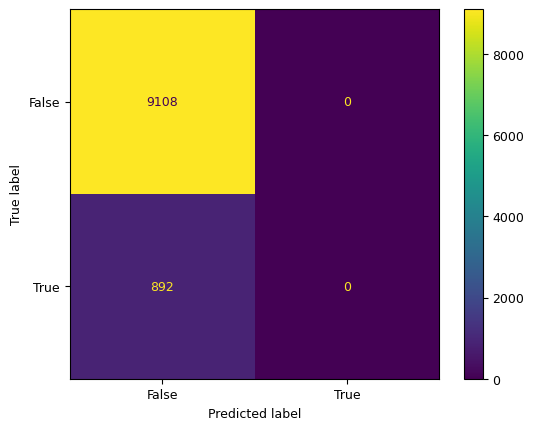

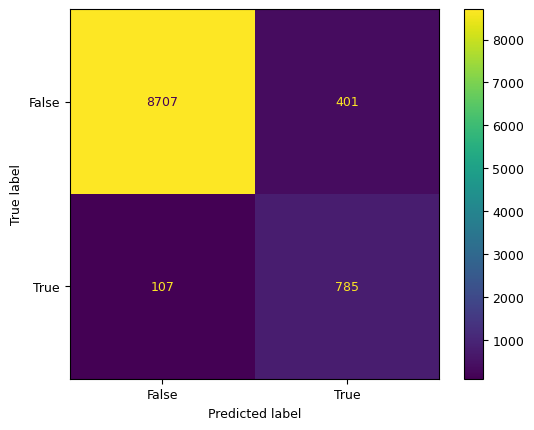

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_test_5,y_pred_dummy) 
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_5,y_pred_sdg)
plt.show()

### Qe Conclusion

In this exercise, we evaluated classification algorithms using custom Python metrics and scikit-learn's functions. We assessed precision, accuracy, recall, and the F1-score for an SGD classifier and a Dummy classifier. The SGD classifier outperformed the Dummy classifier in all metrics. However the dummy clasifier was significantly closer in accuracy. Therefore this exercise was meant to show us some important metrics to use when evaluating your algorithm. These metrics are of course use case specific. Fx it could be a good idea to have a high precision when judging criminals or have a high recall/sensitivity when scanning for diseases. Furthermore the F1-score is usefull if you don't care as much about the true negatives as it takes both into account. As is the case for the "is it a 5?"-algorithm and therefore the F1 provides us with a more accurate assesment of how useful the sdg algorithm and dummy-classifier are with thier ~75% and 0% respectively 

 Furthermore Confusion matrices and heatmaps provided detailed insights into their performance, and granted us a good visual component for the metrics. These will be important further in the course when we analyze more complex systems with more parameters. 

# Frontpage
Resubmission of "Opgavesæt O1" 

Date 29/09/2023

Group 12

Members:

Oscar Damgaard Nielsen 201811388

Bjarke Justesen Karlsen 202010613

My-Thanh Thi Le 202006329

# SWMAL Exercise


## Supergruppe diskussion


## § 2 "End-to-End Machine Learning Project" [HOML]




#### Resume: Look at the Big Picture

You have to frame the problem, and figure out what you are trying to solve. What is the core issue? Is it a reggression or classification task? 
Furthermore you have to select performance messures. fx Accuracy isn't very good when evaluating a digit evaluator.
finally you have to check your assumptions. If you assume it is a regression task, but find out it is converted to a classification task down stream. Then that really sucks.

#### Resume: Get the Data

This segment talks about how to use jupyter notebooks which is presumed to be the thing we should skip summarising. 
When you aquire your data you should take a look at a few elements to ensure you know what types of data you are dealing with. 
The method describe() or hist can also give som standard statistical analysis to help you get a feel for the data.
At this stage you should also create you test set, by shuffling the data and setting about 20% aside for testing.
It needs to be shuffled so the algorithm doesn't just figure out every number is larger than the last fx.
You should seed your shuffling so you get the same one each time. Otherwise if you train an algorithm on the same set several times it will end up knowing the whole set.
You also need to ensure you data is representative of the true data population, otherwise you should consider stratifying your dataset.

#### Resume: Explore and Visualize the Data to Gain Insights,
This segment is about data exploration and visualization to grain insight in the data. We have to get a more in depth about the data, which only do for the traing sets. It is a good idea to visualize the data through heatmaps/histograms. You may need to set the opacity down or color different segment for finding the patterns. You will also have to look at the correlations between the different value, but only if the dataset is not too large. The correlation coefficient ranges -1 to 1 and if the correlation is close to -1 or 1 it tells there is correlation between the data. Zero mean there is no linear correlation. The last part of this segment is about experiment with attribute combinations. Some atrributes maybe don't make sence they stand alone, so maybe combine them.

#### Resume: Prepare the Data for Machine Learning Algorithms

You need to find a strategy for handling missing datapoints such as entries missing some attributes. You can either remove them, use the median, or if you want to get fancy use the k-nearest neighbour.
Furthermore machine learning models prefer numbers, and tend to skew towards numbers with larger intervals. Therfore it could be a good idea to standerdize your data to be between -1 - 1. This can be done by scaling all the 

#### Resume: Select and Train a Model

You are now ready to select and train a model. Firstly try a simple model as linear regression, however some values may be way off. These data can be hard to understand, so we are going to use some tools for validation. This is can be MAE or RMSE. Another problem with the data if examples used the k-nearstnieghbor is overfitting or underfitting the training data. The main way to fix underfitting is try using a more complex model and how it proforms. The problem can also be the data is too small and one way to help simulate more date is it use the k-fold cross-validation, it spilt the data into nonoverlapping subsets. The model can now traing for every subsets and all the different score for each subsets put together give a value for its preformance. 


#### Resume: Fine-Tune Your Model

After training the models, we have to fine tune the. For finetuning the model, you can manually try to find a great combination for the hyperparameter. Or use the GridSearchCV if you have a few hyperparameter or the RandomizedSearchCV for testing alot of hyperparameter. 

Another way to fine-tune your system is combine the models that performs best as a group. This mothod is called the Ensemble. It will often preform better the individual models. 

You may need to look into your best models and understand their errors. It can be some of the features don't make sense to have, so maybe you want to drop them. Or maybe it is because you are missing some features and need more data. May need to look into outliers.  

When you system if preforming well on the train set, it may be time to try evaluating your system on the test set. After testing you will need to evalute the scores. The system may proferm really good on the test set or not. If it doesn't you may need to go back and finetune even more. If the system preform very well, then may need to make it ready for launch. 



#### Resume: Launch, Monitor, and Maintain Your System

If your system came to this step, you will need to get it ready for production. For a system to go into it need to be launch, monitor and maintain. This can be done differenly ways. First way is that you can create documentation and conduct tests and integrate it. The alternative approach is using a model on cloud platform. 

It is not the last step to just deploying it. You will have to collect new fresh data and keep training the model and evaluating performance. It is import to catch potiontial issuses early. It is also a good idea to have a backup of the models in a database. The models can end up being corrupted. 

#### Resume: Try It Out!.

Now you have read all the a both segment, you will have a understanding of what machine learning project look like. You can now see how much goes into making a grate system. The machine learning algorigthms are important, however it is preferable to be comfortable with the hole process.


  SWMAL Opgave

## Dataanalyse
Denne opgave er skrevet på dansk efter aftale med Carsten

### Qa) Beskrivelse af datasæt til O4 projekt

I forbindelse med vores O4 projekt har vi valgt at arbejde med image recognition. Vi vil udvikle en model, som kan analysere og identificere de forskellige vejrforhold på billeder. Dette kan være Cloudy, Rainy, Sunny eller Sunrise. For at opnå dette mål vil vi at bruge en klassifikationsmetode, hvor billeder kategoriseres, så vores model kan trænes til at forudsige vejret, når det præsenteres med et nyt billede.

Vi står over for en multi-class image classification-opgave, da der er fire forskellige vejrtilstande, som skal genkendes. Denne opgave vil blive løst ved hjælp af supervised learning, hvor vi træner vores model vha. et datasæt

For at lave denne model har vi hentet data fra kaggle, som er en platform, der udbyder store dataset. Vi har et datasæt som består af ca. 1200 billeder, opdelt i de 4 kategorier. Der vil være ca. 300 samples pr. kategori til at træne/teste vores model. Disse samples består af forskellige billeder, som hver især illustrerer en af de fire kategorier af vejr, Sunny, Rainy, Cloudy og Sunrise, som vil være vores target værdier.

Datasættet vil derfor blive opdelt i tre sæt: træningssæt til at træne modellen, valideringssæt til at finjustere modelparametre og teste ydeevnen, og testsæt til endelig evaluering af modellen.

Når vi arbejder med image recognition, kan det være lidt sværere at identificere fejl i dataene. 
Der kan forekomme eventuelle fejl og usikkerheder  i form af belysning, synsvinkler eller andre faktorer, som vil påvirke billedernes kvalitet. Det kan også være, at et af billederne er havnet i den forkerte kategori i træningssættet, altså er der fejl i labels. På denne måde vil vores model ikke trænes korrekt til at predict vores targetværdier. Der vil blive lavet en dataanalyse af vores datasæt for at identificere korrupte data. 

Dette projekt sigter altså mod at udvikle en image recognition-model til at identificere vejrforhold på billeder ved hjælp af supervised learning.


### Qb) Dataanalyse af eget datasæt

Her opsættes dataanalysen, som forklares i slutningen af denne opgave.

In [ ]:
#make function to fetch dataset

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


def getDataSet(categories: list, folder: str):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(folder, category)
        label = categories.index(category)  # Assign a numerical label to each category
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (128, 128))  # Resize to a common size
                    img = img / 255.0  # Normalize pixel values to [0, 1]
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return images, labels




Der er implementeret en funktion getDataSet(), som tager en liste med kategorier og en string, som er navnet på mappen. 
Den vil give hvert image et label baseret på kategori, og index. Derudover vil den præprocesserer billederne, og sorterer de korrupte filer fra.

Data              dataanalyse.ipynb pipelines.ipynb   weather_dataset


Failed to load image: weather_dataset/Shine/shine131.jpg
Failed to load image: weather_dataset/Rain/rain141.jpg


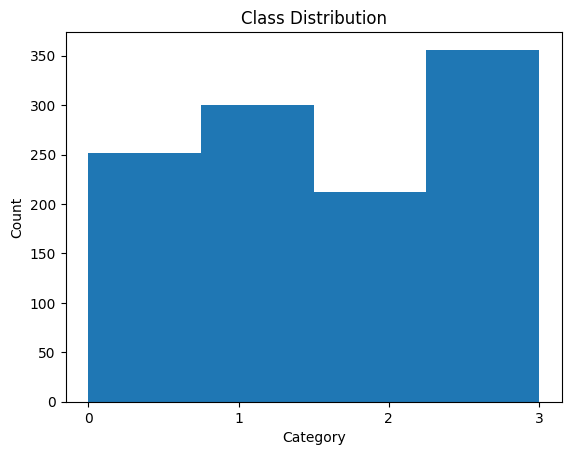

Category for image 0: Shine


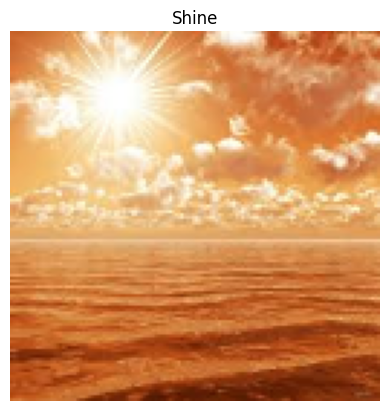

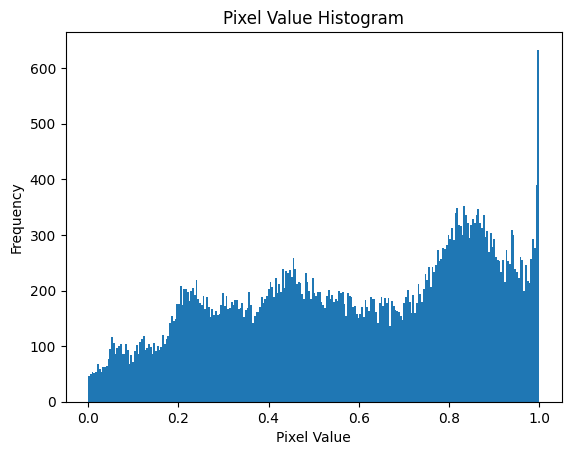

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

! ls
# ! dir
data_folder = "weather_dataset"
categories = ["Shine", "Cloudy", "Rain", "Sunrise"]


images, labels = getDataSet(categories, data_folder)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Assuming 'labels' is a list or NumPy array of category labels
# You can create histograms of the labels to visualize the class distribution
plt.hist(labels, bins=len(np.unique(labels)))  # Use as many bins as unique labels
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(np.unique(labels))  # Set x-ticks to unique class labels
plt.show()

# Assuming 'images' is a NumPy array containing the image data
# You can create a histogram of pixel values for one image (e.g., the first image)
print(f"Category for image 0: {categories[labels[0]]}")
  
plt.imshow(images[0])
plt.axis('off')  # Optional: Turn off the axis labels and ticks
plt.title(categories[labels[0]])
plt.show()

plt.hist(images[0].ravel(), bins=256, range=(0, 1))  # Assuming normalized pixel values in [0, 1]
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Histogram')
plt.show()

Der er lavet to histrogrammer. Et til at give en oversigt over hvor meget data, der er til hver kategori, og et til at vise pixel feature på et billede. 

Efter frafiltreringen af de billeder der ikke kunne loades ses det på histogrammet, at der er mellem 200-350 billeder inden for hver kategori. Dette vurderer vi til at være en tilstrækkelig mængde af hver kategori til at kunne træne en billedgenkender og stadig have 100 billeder tilovers til testing. 

Der er valgt at lave et histogram for image[0], som hører under kategorien "Shine". 
På dette histogram kan vi se hvordan frekvens af pixels på billedet er fordelt ud over pixel value 0-1. 
Pixel value viser hvor mørke eller lyse farverne på pixelsne er, hvor 0 er helt mørkt og 1 er helt hvidt. 

På histogrammet ser vi, at der er størst frekvens ved Pixel value 1, samt at frekvensen stiger mere value. Dette giver god mening, da billedet skal repræsentere Shine, som gerne skulle være meget lyst. 
Histogrammet stemmer derfor overens med billedet.

# SWMAL Exercise

## Pipelines
$$
    \newcommand\rem[1]{}
    \rem{SWMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\scriptsize #1}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\text{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\text{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\text{\scriptsize test}}}
    \def\powtrain{\pown{\text{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
$$
We are going to implement a min/max scaler for a multilayer perceptron (MLP). The MLP is designed to receive input data within specific ranges: `[0;1]` or `[-1;1]`. The min/max scaler will adjust the data accordingly, ensuring that it falls within the expected range and preventing saturation to the minimum or maximum values.

In [1]:
%matplotlib inline

import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def LoadDataFromL01():
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=-48656.97

OK


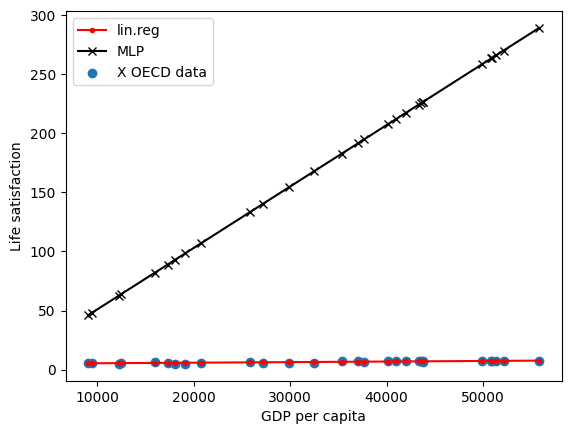

In [2]:
# Setup the MLP and lin. regression again..

def isNumpyData(t: np.ndarray, expected_ndim: int):
    assert isinstance(expected_ndim, int), f"input parameter 'expected_ndim' is not an integer but a '{type(expected_ndim)}'"
    assert expected_ndim>=0, f"expected input parameter 'expected_ndim' to be >=0, got {expected_ndim}"
    if t is None:
        print("input parameter 't' is None", file=sys.stderr)
        return False
    if not isinstance(t, np.ndarray):
        print("excepted numpy.ndarray got type '{type(t)}'", file=sys.stderr)
        return False
    if not t.ndim==expected_ndim:
        print("expected ndim={expected_ndim} but found {t.ndim}", file=sys.stderr)
        return False
    return True

def PlotModels(model1, model2, X: np.ndarray, y: np.ndarray, name_model1: str, name_model2: str):
    
    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model, X: np.ndarray, y: np.ndarray,):
        assert isNumpyData(X, 2) and isNumpyData(y, 1) and X.shape[0]==y.shape[0]
        y_pred_model = model.predict(X)
        score_model = r2_score(y, y_pred_model) # call r2
        return y_pred_model, score_model    

    assert isinstance(name_model1, str) and isinstance(name_model2, str)

    y_pred_model1, score_model1 = CalcPredAndScore(model1, X, y)
    y_pred_model2, score_model2 = CalcPredAndScore(model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{(name_model1).rjust(l)}.score(X, y)={score_model1:0.2f}")
    print(f"{(name_model2).rjust(l)}.score(X, y)={score_model2:0.2f}")

# lets make a linear and MLP regressor and redo the plots
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y, "lin.reg", "MLP")
print("\nOK")

### Qa) Create a Min/max scaler for the MLP

This first version we are creating is the default version si most simplified solution. Here we take the max and min value from X. From that we are calculating the standardization.

$$
    \ar{rl}{
        \text{x'} &= \frac{\text{x}-\mu_x}{\sigma_x} 
    }
$$

Now we can re-train the MLP and re-plot with the preprocess data.

maxvalue=55805.204000000005
minvalue=9054.914
The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.73

OK


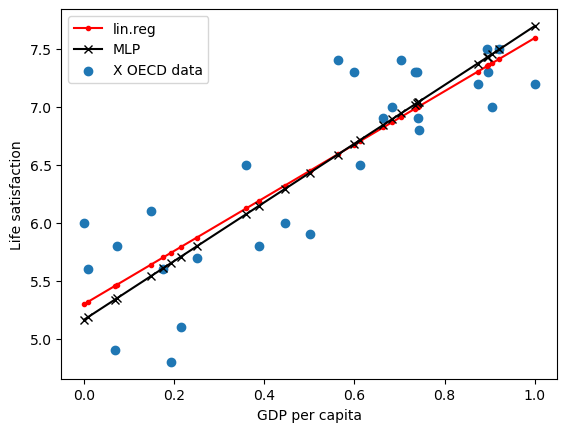

In [5]:
maxvalue= X.max()
print(f"maxvalue={maxvalue}")
minvalue= X.min()
print(f"minvalue={minvalue}")

X_scaled = (X-minvalue)/(maxvalue-minvalue)

mlp.fit(X_scaled, y)
linreg.fit(X_scaled, y)
print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X_scaled, y, "lin.reg", "MLP")
print("\nOK")

### Qb) Scikit-learn Pipelines

Now, we will perform the re-scaling again, this time using a pipeline and a scaler from sklearn. We will be utilizing sklearn.pipeline.Pipeline and sklearn.preprocessing.MinMaxScaler. The pipeline acts as an intelligent composite constructor, which reduces the number of variables involved. This is achieved by directly passing the scaled values into the model we intend to train. This is done by calling the `pipe.fit()`.

Again we are using the `PlotModels()` function to retraing the linear regressor on the scaled data.

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.72


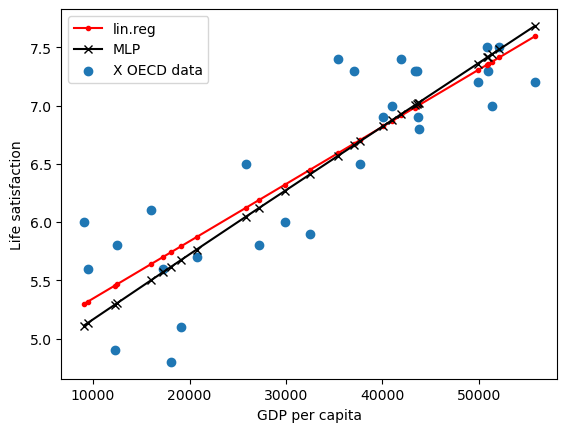

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipe = Pipeline(
    [
        ('Scaler', MinMaxScaler()), 
        ('mlp',mlp)
    ]
)
pipe.fit(X, y)
linreg.fit(X, y)
PlotModels(linreg, pipe, X, y, "lin.reg", "MLP")

### Qc) Outliers and the Min-max Scaler vs. the Standard Scaler

The fundamental problem with the min/max scaler is it linearly transforms the data to fit within a specified range `[0;1]` or `[-1;1]`. This means the min and max value often can be set by outliers and can cause the data to be distortion of the overall distribution. It can be a single outliers with an extremly low value, the min/max scaler will strech to fit the one outlier. So the rest of the data is getting a more narrow range, this can lead to potentially losing important information.

On the other hand we have the standard scaler, which is less sensitive to ouliers. This is because the standard scale preforms z-score normalization, which is part of statics. In other words this processs center the data around 0 and scales it based on its variance. So the bigger standard variance the less influence on the scaling.

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.80


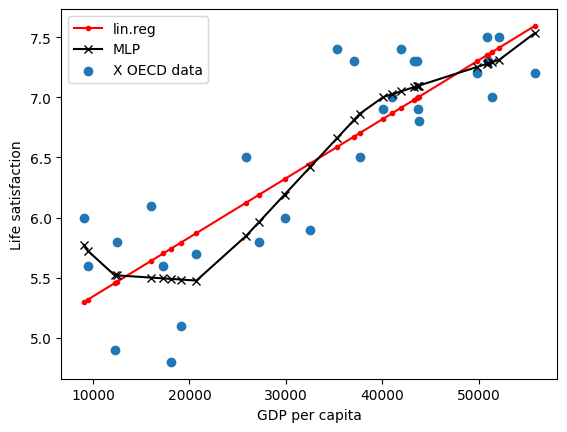

In [6]:
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('Scaler', StandardScaler()), ('mlp',mlp)])

pipe.fit(X, y)
linreg.fit(X, y)
PlotModels(linreg, pipe, X, y, "lin.reg", "MLP")

### Qd) Modify the MLP Hyperparameters

Now we want to try chaning the different hyperparametes associated with the MLP. We are going to try chaning the amount of neurons, solver and the activation. We will use the $R^2$. to check if the output still is sensible. 

Firstly try new amount of neurons, we are chaning from 10 to 5. 

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.73


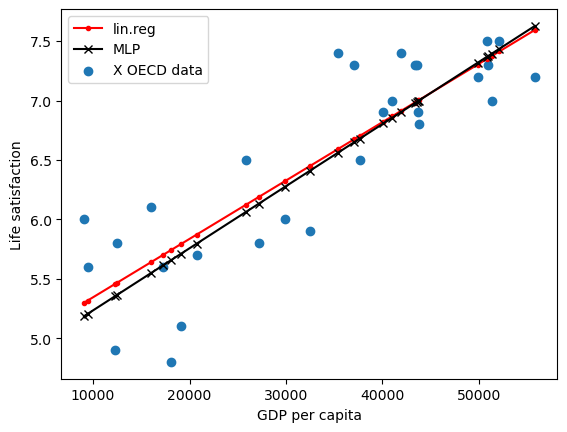

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

mlp = MLPRegressor(hidden_layer_sizes=(5, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)


pipe = Pipeline(
    [
        ('Scaler', MinMaxScaler()), 
        ('mlp',mlp)
    ]
)
pipe.fit(X, y)
linreg.fit(X, y)
PlotModels(linreg, pipe, X, y, "lin.reg", "MLP")

We can observe that the MLP still prefromce fine with 5 neurons. So we are now testing for only one neurons. 

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.70


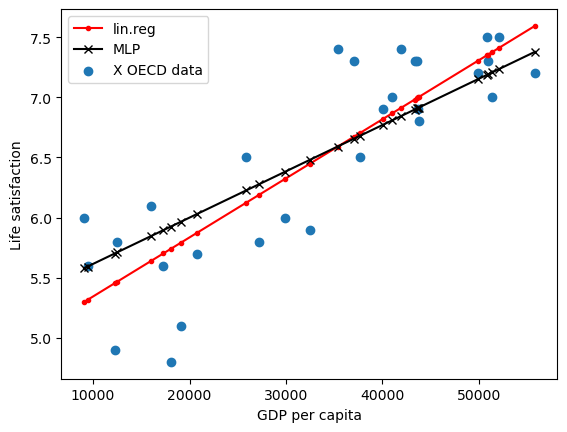

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

mlp = MLPRegressor(hidden_layer_sizes=(1, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)


pipe = Pipeline(
    [
        ('Scaler', MinMaxScaler()), 
        ('mlp',mlp)
    ]
)
pipe.fit(X, y)
linreg.fit(X, y)
PlotModels(linreg, pipe, X, y, "lin.reg", "MLP")

The $R^2$ is only a little amount worse than the linear regression. 

Now we are going to try using a new activation functions. This is a mathematical operations applied to the output of a neuron in a neural network. This helps introducing a non-linearity into the network. This allows the neural network to learn and model complex relationships btween input and output. We are using the logistic also called simoid function. The Formula is 
$$
    \ar{rl}{
        f(x) &= \frac{1}{1+(e)^{-x}} 
    }
$$

The formula output range is between `[0;1]`

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.72


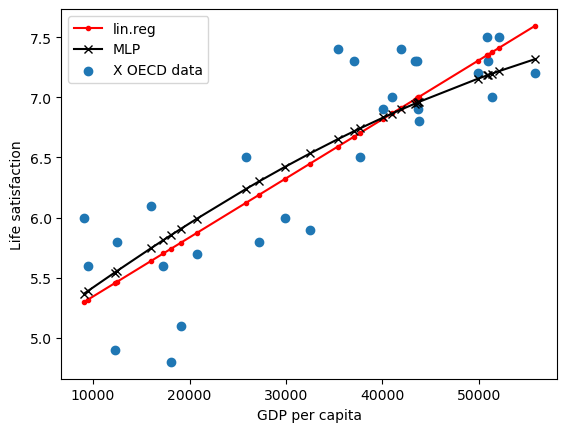

In [13]:
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='logistic',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
pipe = Pipeline(
    [
        ('Scaler', MinMaxScaler()), 
        ('mlp',mlp)
    ]
)
pipe.fit(X, y)
linreg.fit(X, y)
PlotModels(linreg, pipe, X, y, "lin.reg", "MLP")

Chaning the activation function to be logistic the $R^2$ is only a little amount worse than the linear regression. You can obsever the shape is non-linear. 

Now we want to try to use a different solver. We are going with the stochastic gradient descent`sgd` instead of the `adam`. This is a algorithm that is often use in matchine learning. It is a variant of the standard gradient descent algorithm.  

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.50


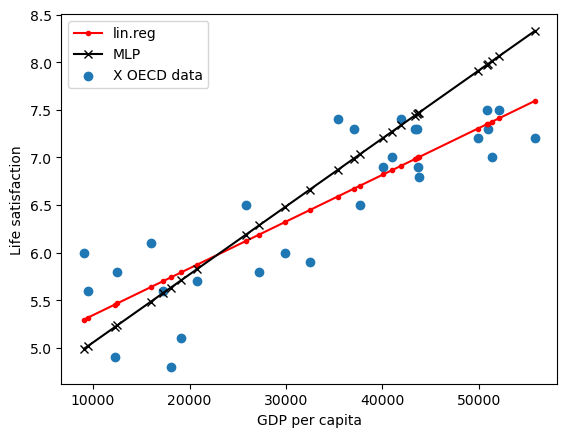

In [9]:
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='sgd',  # Try different solvers
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
pipe = Pipeline(
    [
        ('Scaler', MinMaxScaler()), 
        ('mlp',mlp)
    ]
)
pipe.fit(X, y)
linreg.fit(X, y)
PlotModels(linreg, pipe, X, y, "lin.reg", "MLP")

# SWMAL Exercise


## Training a Linear Regressor I 

The goal of the linear regression is to find the argument $w$ that minimizes the sum-of-squares error over all inputs. 

$$
    \def\rem#1{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no  newlines in defs}
    \def\eq#1#2{#1 &=& #2\\}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\ac#1#2{\left[\ar{#1}{#2}\right]}
    \def\st#1{_{\textrm{\scriptsize #1}}}
    \def\norm#1{{\cal L}_{#1}}
    \def\obs#1#2{#1_{\textrm{\scriptsize obs}}^{\left(#2\right)}}
    \def\diff#1{\mathrm{d}#1}
    \def\pown#1{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\textrm{\scriptsize test}}}
    \def\powtrain{\pown{\textrm{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \def\pfrac#1#2{\frac{\partial~#1}{\partial~#2}}
    \def\dfrac#1#2{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
\bw^* ~=~ \left( \bX^\top \bX \right)^{-1} \bX^\top \by
$$



#### Qa Write a Python function that uses the closed-form to find $\bw^*$

We are going to make a function `GetTheNormalEquation(X, y)`. The function takes a training dataset, where we have the matrix`X` and the vector of the label `y` and returns the `w` via the closed-form. 

The function is going to to use the normal equation as presented below:

$$
\bw^* ~=~ \left( \bX^\top \bX \right)^{-1} \bX^\top \by
$$

Inside the function we make a variable called X_b which is the concatenate column of ones to X. In other words it adds the bias term. 


Use the test data, `X` and `y` in the code below to find `w` via the closed-form. Use the test vectors for `w` to test your implementation, and remember to add the bias term (concat an all-one vector to `X` before solving). 

The next line where we store variable `w` we simply use the normal equation. It constists of multiple parts. The  `np.linalg.inv()` calculates the inverse of the matrix obtained from the 
$$
\left( \bX^\top \bX \right)^{-1}
$$. 

The product of `np.linalg.inv()` is multiplied with the rest, which is the transpose of the input data matrix with the target output vector. It results in a vector of size \(d+1\).

$$
 \bX^\top \by
$$


In [10]:
import sys,os
sys.path.append(os.path.expanduser('../'))
import numpy as np
from libitmal import utils as itmalutils

def GetOS():
    return dir if os.name == 'nt' else ls

# The Normal Equation p.134
def GetTheNormalEquation(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Concatenate a column of ones to X
    w = np.linalg.inv(X_b.T @ X_b) @ (X_b.T) @ (y)
    return w

def GenerateData():
    X = np.array([[8.34044009e-01],[1.44064899e+00],[2.28749635e-04],[6.04665145e-01]])
    y = np.array([5.97396028, 7.24897834, 4.86609388, 3.51245674])
    return X, y

X, y = GenerateData()

w = GetTheNormalEquation(X, y)


# TEST VECTOR:
w_expected = np.array([4.046879011698, 1.880121487278])
itmalutils.PrintMatrix(w, label="w=", precision=12)
itmalutils.AssertInRange(w, w_expected, eps=1E-9)

print("OK")

w=[4.046879011698 1.880121487278]
OK


#### Qb Find the limits of the least-square method

The problem with calculating of a matrix inverse can be compationally expensive. This is especially the case for larger or nearly singular matrices. A nearly singular matrix is one that is almost singular, which means it does not have a true inverse. 

In the code below we have a function ` GenerateData(M, N)`. The given code The parameter M was set to 10000 instead of 1000, which provide a singular matrix and can not be calculated using the `GetTheNormalEquation(X, y)`

The reason it takes such a long time is the computational complexity, meaning doubling the number of features then you have to multiply the computation time be rougly 2<sup>2.4</sup>


In [11]:
from sklearn.linear_model import LinearRegression 

def GenerateData(M, N):
    # TEST DATA: Matrix, taken from [HOML]
    print(f'GenerateData(M={N}, N={N})...')
    
    assert M>0
    assert N>0
    assert isinstance(M, int)
    assert isinstance(N, int)

    # NOTE: not always possible to invert a random matrix; 
    #       it becomes sigular, hence a more elaborate choice 
    #       of values below (but still a hack): 
    X=2 * np.ones([M, N])
    for i in range(X.shape[0]):
        X[i,0]=i*4
    for j in range(X.shape[1]):
        X[0,j]=-j*4

    y=4 + 3*X + np.random.randn(M,1)
    y=y[:,0] # well, could do better here!
    
    return X, y

X, y = GenerateData(M=10000, N=20)

w = GetTheNormalEquation(X, y)

# Print w
itmalutils.PrintMatrix(w, label="w=", precision=12)


print("OK")

GenerateData(M=20, N=20)...
w=[ 1666387.5502728098          2.440137876938   364127.55597364274
   -1027466.0868604467    -355721.375006271       54929.827803658765
    -379931.0885377476      82890.96006455205   -260862.72574724632
      10940.279039915009  -169174.47809120276    433595.0309961927
    -130711.1726267726     275061.5205127626     -50454.66184441206
    -149800.39751745152    107994.28902418479     91549.58807911839
       4787.796794080489    37335.08970069502    -43486.08680883595 ]
OK


When increasing w, the following error occurs: LinAlgError: Singular matrix

# SWMAL Exercise


## Gradient Descent Methods and Training


$$
    \def\rem#1{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no  newlines in defs}
    \def\eq#1#2{#1 &=& #2\\}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\ac#1#2{\left[\ar{#1}{#2}\right]}
    \def\st#1{_{\textrm{\scriptsize #1}}}
    \def\norm#1{{\cal L}_{#1}}
    \def\obs#1#2{#1_{\textrm{\scriptsize obs}}^{\left(#2\right)}}
    \def\diff#1{\mathrm{d}#1}
    \def\pown#1{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\textrm{\scriptsize test}}}
    \def\powtrain{\pown{\textrm{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \def\pfrac#1#2{\frac{\partial~#1}{\partial~#2}}
    \def\dfrac#1#2{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
$$

### Qa The Gradient Descent Method (GD)

Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. Which means it is an iterative optimization algorithm used to find the minimum of a function. The function used in this case is the cost function `J(w)`. The idea is based on taking steps proportional to the negative of the gradient of the function at the current point 

The code below firstly imports all the libraries. Secondly theres is created a new function `GenerateData()` and the function returns 3 values `X, X_b, y`. `GenerateData()` generates random data for a linear regression where `X` represents a matrix of input features and `y` represents the target values. And atlast we have the `X_b` and it is the augmented feature matrix with the bias term. 

The `eta` is the learning rate, which is the steps the algorithm  takes towards finding the minimum of the cost function. If `eta` is too large, the algorithm may overshoot the minimum, which can potentially causing it to keep bouncing around near the minimum without settling down or it never reach a stable minimum and keeps running indefinitely. Conversely, if `eta` is too small, the algorithm may take a very long time to it never reach a stable minimum and keeps running indefinitely or get stuck in a local minimum.

The `n_iterations` is the number of epochs also called iterations. 
The `m` is the number of samples
The `theta` is the intial random initializtaion

Inside the forloop we calculate the compute gradients of MSE with respect to theta and then we update the using the gradients and learning rate. This is repeated for the number of iterations. 

See the pictures below on the left the learning rate is too low, and will eventually reach the solution, however it takes a long time. The middle the learning rate is looks pretty good, because we can see in a few iterations it has already found a good solution. On the rigth the learning rate is too high, which mean the algorithm diverges. The algorithm is getting further and futher away from the solution. 

stochastic gradient descent theta=[4.14149307 2.81305367]


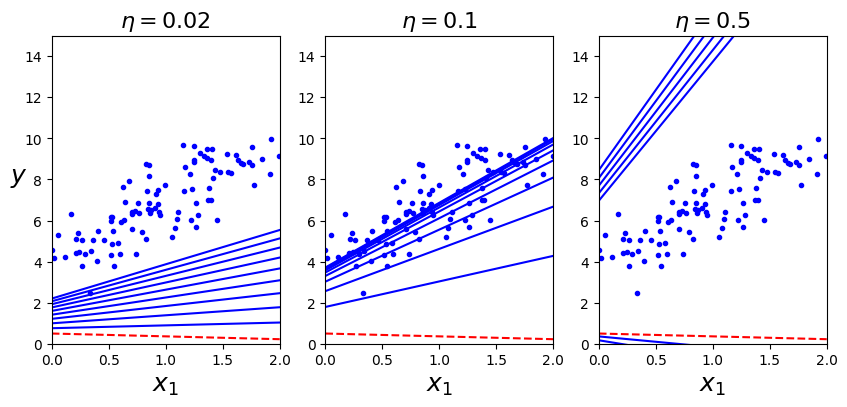

OK


In [1]:

# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def GenerateData():
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    #X_b represents a matrix of input features
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    return X, X_b, y

X, X_b, y = GenerateData()

eta = 0.1 # learning rate
n_iterations = 1000 #num of epochs/iterations
m = 100 # num of samples
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    # Compute gradients of MSE with respect to theta
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    # Update theta using the gradients and learning rate

    theta = theta - eta * gradients

print(f'stochastic gradient descent theta={theta.ravel()}')

##########################################################
# rest of the code is just for plotting, needs no review

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta_path_bgd = []
theta = np.random.randn(2,1)  # random initialization

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

print('OK')

### Qb The Stochastic Gradient Descent Method (SGD)

Stochastic Gradient Descent is a variant of the Gradient Descaent. The main problem with the Gradient Descent is it uses the whole training set and it is really slow. Wheras the SGD is the opposite. SGD takes a random instance in the training set at every step and computes the gradient based only on the single instance. The problem with the SGD will over time be very closed to the minimum, however will continue to bounce around and never settle down. 

The `np.random.randint(m)` generate a random integer between `[0;m)`. In the context `m` is the total number of data points in the traning set.

The main differens in the code is the extra forloop in the SGD compared to the GD. This extra forloop iteraters over all elements in the `X_b`. Another distinction lies in how the gradients are calculated. In GD, they are divided by m. These two reasons are connected since in SGD, we compute gradients each time we go through the for loop.

The `theta` is calculated the same way, however the gradint is changed

```python
for epoch in range(n_epochs):
    for i in range(m):
        .
        .
        .
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = ...
        theta = ...
```
where it for the GD method was just
```python
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = ..
```

stochastic gradient descent theta=[4.13232694 2.79527929]
Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_=[4.09914528], sgd_reg.coef_=[2.87331758]


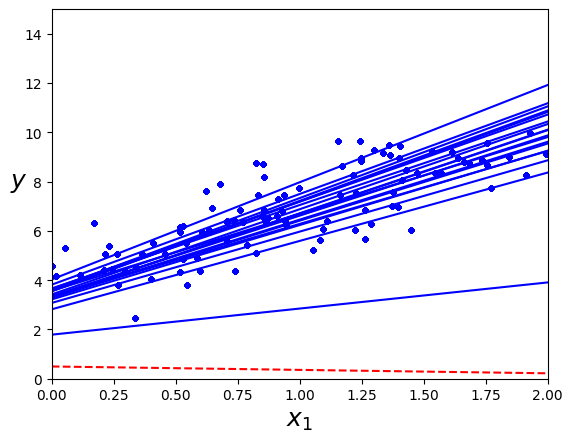

OK


In [2]:
# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta) 
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)        
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

        plt.plot(X, y, "b.")      

from sklearn.linear_model import SGDRegressor
#sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
print(f'stochastic gradient descent theta={theta.ravel()}')
print(f'Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_={sgd_reg.intercept_}, sgd_reg.coef_={sgd_reg.coef_}')

##########################################################
# rest of the code is just for plotting, needs no review 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              

plt.show()        

print('OK')

### Qc Adaptive learning rate for $\eta$  

The `learning_schedule()` functions is a part of the SGD which takes one parameter as input. It is an adaptive learning rate and it defines how the learning rate
($\eta$). The objective of the learning rate is to start and later reduce the step side. This is done to escape local minimums and later on settle in the global mininmum. The input `t` is the current iteration number. The `t0` is the initial learning rate, which is the larger initital step. The `t1` is determeíne how fast the learning rate decreases. A smaller value make the learning rate decrease more slowly over time. 

Another thing you can do with the `SGDRegressor` is set the learning rate to constant or adative in the hyperparameter. 

```python
SGDRegressor(max_iter=1,
             eta0=0.0005,
             learning_rate="constant", # or 'adaptive' etc.
             random_state=42)
```

### Qd Mini-batch Gradient Descent Method 

The mini-batch gradient descent combines the best aspects of SGD and GD. The mini batch will start with taking random numbes as the SGD and escape from local minima. When the mini-batch is near the global mimimums, it will use the GD method, which is taking steps proportional to the negative of the gradient of the function at the current point 

The main advantage of mini batch GD over the SGD you get a preformce boost from the optimization of matrix operations. 

The main different is the MGD iterates tough the data in a mini-batches of 20 data at the time, whereas the GD proceses the entire dataset at once and the SGD is only processes one data point at a time. The gradients computation is now devided by the size of the minibatch. From the SGD we introduce the learning rate and it helps to decreases the learning rate as the number of iterations increases. The `theta_path_mgd` appends the each `theta` from each training.

In [3]:
# NOTE: code from [GITHOML], 04_training_linear_models.ipynb
import numpy as np
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(f'mini-batch theta={theta.ravel()}')
print('OK')

mini-batch theta=[4.04995397 2.7175486 ]
OK


### Qe Choosing a Gradient Descent Method

GD is good to get to the minimum, however it can be stuck in local minimum (if they occur). In the pictures below there is at lot of blue computation, which is expensive in a large datasets.

SGD is fast to convergence due to the frequent parameter update and is good for large datasets as it only processes one data point at a time. The problem with the SGD is willl over time be very close to the minimum, however will continues bounce around and never settel down. 

MGD as is a compromise between GD and SGD. The only bad thing about is it requires tuning of batch size as a hyperparameter. The picture below illustate a good use of the MGD

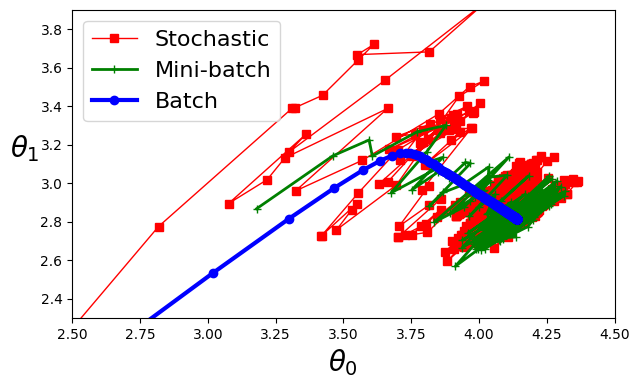

OK


In [4]:
# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
print('OK')

# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

In this exercise we will test the function of ANN as an universal approximator. 
We will use a simply ANN consisting of two  neurons in a hidden layer. 

We use the `tanh` activation function in the neuron. It can only approximate similar to a monotonic function. When we apply two neurons in a pair, they would be able to approximate an up-hill-then-downhill non monotonic function. 
This is a function with a single maximum.


Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


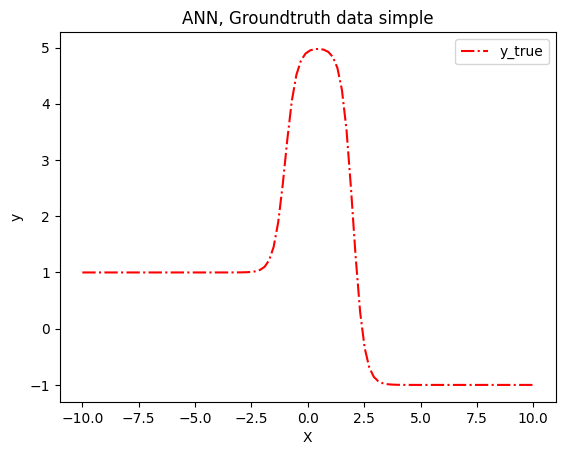

In [284]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

We will fit the data generator and MLP in the layer 2. Them `y_true` and `y_pred` are plotted in a graph

In [285]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X) 

# Extract weights and biases
weights = mlp.coefs_

biases = mlp.intercepts_
print("weights:")
print(weights)
print("biases:")
print(biases)

print("OK")

weights:
[array([[-1.99985578, -1.99966008]]), array([[ 3.00008787],
       [-2.00001444]])]
biases:
[array([ 3.9997559 , -1.99924065]), array([-3.0659848e-05])]
OK


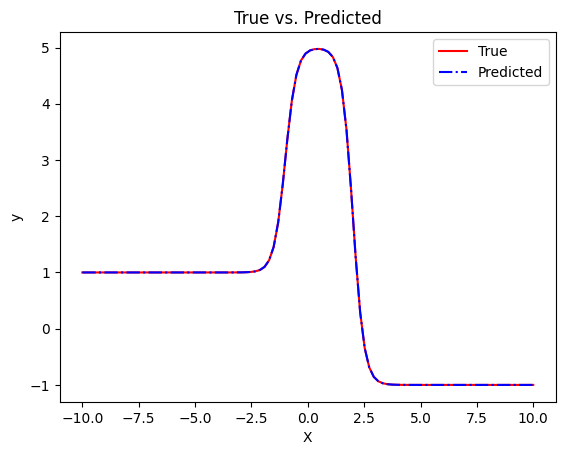

In [286]:
import matplotlib.pyplot as plt

plt.plot(X, y_true, "r", label="True")
plt.plot(X, y_pred, "b-.", label="Predicted")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("True vs. Predicted")
plt.show()


#### Qb)

This drawing below illustrates the ANN with its input-, hidden- and output-layer

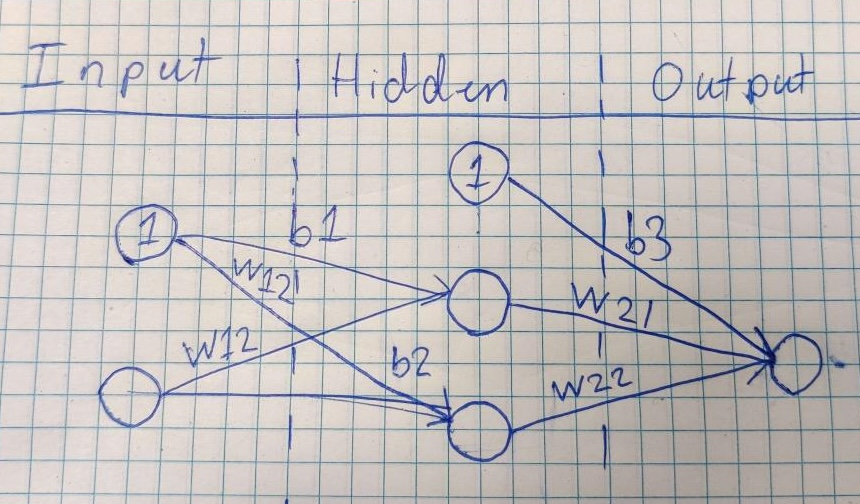

In [287]:
from IPython.display import Image

Image(filename="./Figs/ANN_drawing.jpg", width=500, height=500)

#### Qc)

First we extract the weights and biases into individual parameters so we can use them for the formula. Thereafter we use the formula:
    
     activationFunction(weight*x+bias) 

to find the output for each individual neuron.

For x = 1.5, y_math = [4.28461614]
mlp_sample_prediction:
[4.28461614]


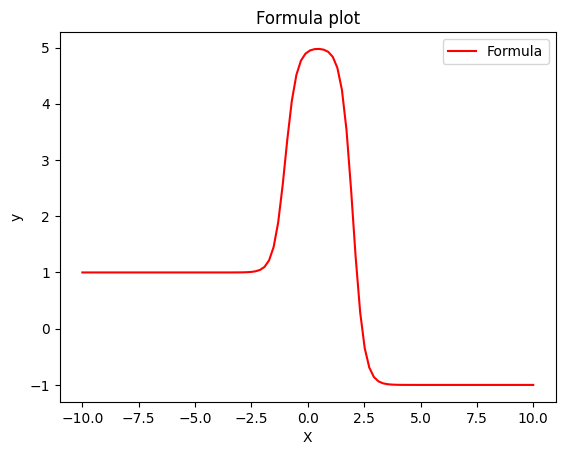

In [288]:
# Extracted weights and biases
import numpy as np
# Extract the weights and biases
w11, w12 = weights[0][0]
w21 = weights[1][0]
w22 = weights[1][1]

b1, b2 = biases[0]
b3 = biases[1][0]

# Define the mathematical formula
def network_formula(x):
    return (w21*np.tanh(w11*x+b1) + w22*np.tanh(w12*x+b2))+b3

# Test the formula with a sample input
x_sample = 1.5
y_sample = network_formula(x_sample)

print(f"For x = {x_sample}, y_math = {y_sample}")

mlp_sample_prediction= mlp.predict([[x_sample]])

print("mlp_sample_prediction:")
print(mlp_sample_prediction)


plt.plot(X, network_formula(X), "r", label="Formula")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Formula plot")
plt.show()


As we can see from the sample we get exactly the same from the formula as from the MLP prediction, and when we plot it it looks just like the MLP plot

#### Qd)

Here we compare the Math formula with the MLP-predicted values as well as the ground truth. We can see that they are almost exactly alike.


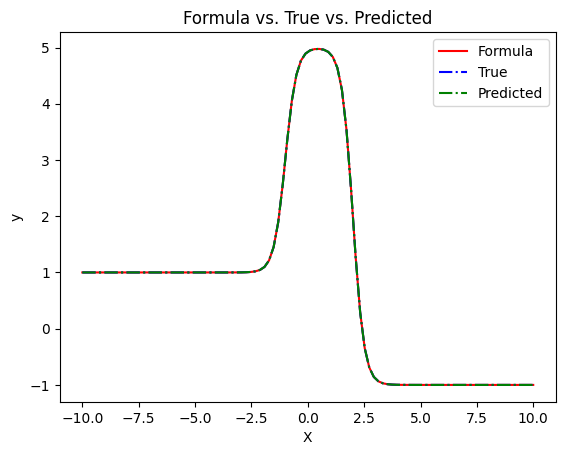

In [289]:

plt.plot(X, network_formula(X), "r", label="Formula")
plt.plot(X, y_true, "b-.", label="True")
plt.plot(X, y_pred, "g-.", label="Predicted")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Formula vs. True vs. Predicted")
plt.show()


#### Qe)

Here we plot the function for just the first neuron, just the second as well as the sum of the two + the bias. 



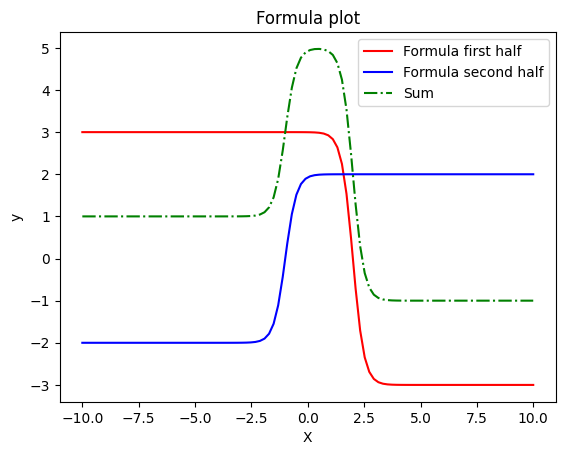

In [290]:
def network_formula_first_half(x):
    return (w21*np.tanh(w11*x+b1))

def network_formula_second_half(x):
    return (w22*np.tanh(w12*x+b2))

sum = network_formula_first_half(X) + network_formula_second_half(X) +b3
plt.plot(X, network_formula_first_half(X), "r", label="Formula first half")
plt.plot(X, network_formula_second_half(X), "b", label="Formula second half")
plt.plot(X, sum, "g-.", label="Sum")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Formula plot")
plt.show()




On the plot we can see that the graph for the individual neurons in the MLP exhibit traits very similar to a monotonic tanh activation function since they both go exclusivlely one direction. However they go in the oposite direction, and therefore it totals to the correct function. This works since the function isn't very complex, but if we had to analyze a more complex system we would need more neurons who would all have traits like these and then it would total to the more complex function. 

#### Qf)
Here is the data for a more complex function we need to analyze.


Text(0.5, 1.0, 'ANN, Groundtruth data for Sinc')

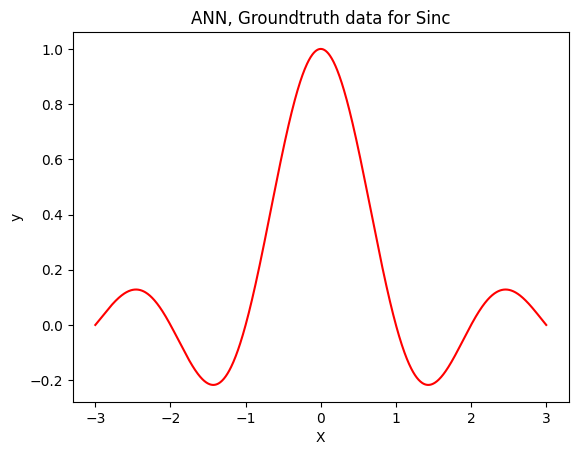

In [291]:


def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")





The data generator is changed to a function, that needs a NN with a higher capacity than the previous simple data. Therfore we increased the number of hidden layers to 5 and the amount of neurons per layer to 10 totalling to 50 hidden neurons compared to the 2 in the previous MLP.  

Text(0.5, 1.0, 'Prediction vs Groundtruth for Sinc')

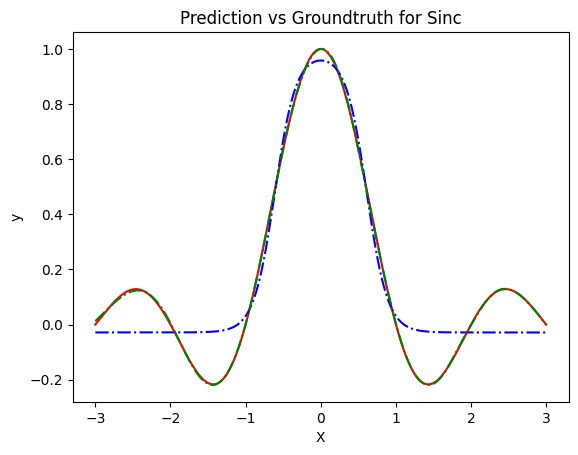

In [292]:
mlp2 = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [10,10,10,10,10], # layes and neurons in layers: 5 hidden layers with 5 neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)
mlp.fit(X, y_true)
y_pred_sinc1 = mlp.predict(X)
mlp2.fit(X, y_true)
y_pred_sinc2 = mlp2.predict(X)

plt.plot(X, y_true, "r-", label="True")
plt.plot(X, y_pred_sinc1, "b-.", label="Old MLP")
plt.plot(X, y_pred_sinc2, "g-.", label="New MLP")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Prediction vs Groundtruth for Sinc")

As you can see, the new MLP with 5000% more neurons is significantly better at prediction, as it almost exactly on top of the ground truth. This is to be expected from a more complex graph.

# SWMAL Exercise


## Convolutional Neural Networks (CNNs)
<details>
For the journal: 

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..), 
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work), 
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
* document the final CNN setup (layers etc., perhaps as a graph/drawing), 
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.
Excercise 9 from [HOML], p.496 2nd./p.535 3rd. (slighty modified):

</details>

CNNs, short for Convolutional Neural Network, is a specialized type of neural network model, that is used to work with two-dimensional image data. It is used for processing grid-like data, such as images or video classification, in general series data and pattern recognition.

CNNs consist of different layers, that make up the functionality of the model.
One of the key components is the convolutional layer that gives the network its name. Another important term is the filter, that performs the pattern recognition in the network

`Convolutional layers` are layers that apply learnable filters (kernels) to small regions of the input data. This is a linear operation that takes a uses one or more filters, that are matrixes with different biases. When applying this filter it will multiply the pixels in the input image with the bias of the filter and then find the sum of the region of the image that the filter is applied to. This will generate a new image/matix, where every pixel will represent the sum of the region applied. 
This makes the network automatically learn the features from the data. The layer helps capture patterns in visual content. 

`Pooling Layer` reduces the dimensionality, which can be reduced by the amounts of pixel. This can be done by down sampling. 

The pooling layer has different approaches, such as, max pooling, average pooling and etc. Max pooling takes the maximum value from a group of neighbouring pixels to the input feature map, while average pooling takes the average of all values in the local region. The Idea is that we want to extract the most activated pixels from the first convolution and shrink the dimensions

`Fully Connected Layers` is after several convolution and pooling layers. There can be more than one of these layers and they act as a traditional neural network. Meaning they connect every neuron from the previous layer to every neuron in the next layer. 

`Activation Functions` is the non-linearity in the model. This can be ReLu, sigmoid or many more. It helps the model to learn complex relationships between features. 

`Multiple Channels` is often used to process images. Which allow to have multiple channels for each colour and for the outline of entity. The convolutional filters are applied independently to each channet. 

**Generalization**

We are using stratified k-fold cross-validation. K-fold involves splitting the training set into k folds, then training the model k times, holding out a different fold each time for evaluation. Stratified means maintaining the same proportions of classes as the original dataset when creating subsets or folds for training and validation. So, the stratified k-fold performs stratified sampling to produce folds that contain a representative ratio of each class. With each iteration, the code creates a clone of the classifier. Using the clone, we train on the training folds and make predictions on the test fold. We then count the number of correct predictions and output the ratio of correct prediction 

**Learning Curve** 

For the learning curves, we plot two graphs: one for training loss over iterations and one for training accuracy over iterations. The x-axis is the number of epochs in both plots, while the y-axis is either the loss or the accuracy.
Training loss is a measure of how well the machine learning model is performing on the training data. We can observe that throughout epochs, the training loss minimizes, and the predicted values become closer to the actual values.

Training accuracy is the accuracy over each epoch. As we can observe, throughout the epochs, it becomes closer to 1. Of course, it does not rise for every epoch, but the overall curve does.

**Code setup**
We are using a CNN and the dataset is from mnist.
1. We load the libary we are using
2. We create train and test data from mnist  
3. We Preprocess the data with reshape and as type and convert y into one-hot encoded formate, so meaning each class is represented as a binary vector.
4. Create the CNN model (Explaining with the piceture)
5. Set up Stratified K-Fold cross-validation and lists to store training metrics at each iteration
6. Loop over folds and use the right data fold
7. Loop over epochs where we store each iteration for this fold
8. After we put the store epochs data into our metrics for this fold
9. Then we evaluate this fold
10. All folds is trained and evaluate
11. Calculate average test accuracy across folds
12. Convert lists to NumPy arrays for easier plotting
13. Plot Training Loss
14. Plot Accuracy Loss





**CNN setup**

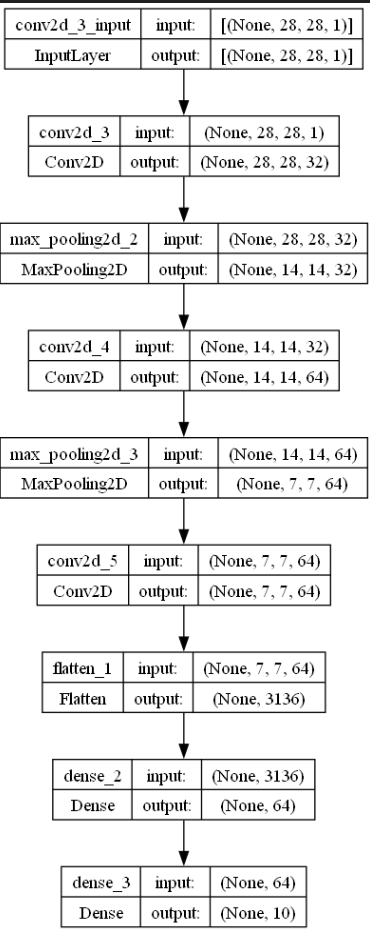

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
=================================================================
Total params: 257,162
Trainable params: 257,162
Non-trainable params: 0
_________________________________________________________________
 

**Experiment**
In order to achieve the best accuracy outcome, we would do different tests, altering the amounts of folds and epochs. From the first test the average accuracy was already very good: ```Test average accuracy: 0.9915000200271606```. 
We generally test on the folds, to get a more robust estimate, since the model gets a more reliable predictioin when practicing with different sets. We also alternated the amount of pooling layers, to see if reducing the spatial dimensions would better the efficiency, while still maintaining accurate predictions. 



### Test with 3 folds and 5 epochs:  
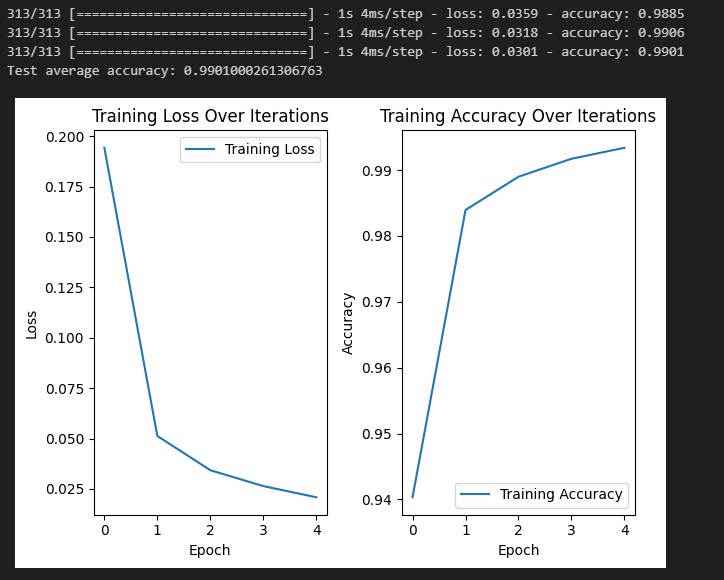

### Test with 6 folds and 17 epochs:   
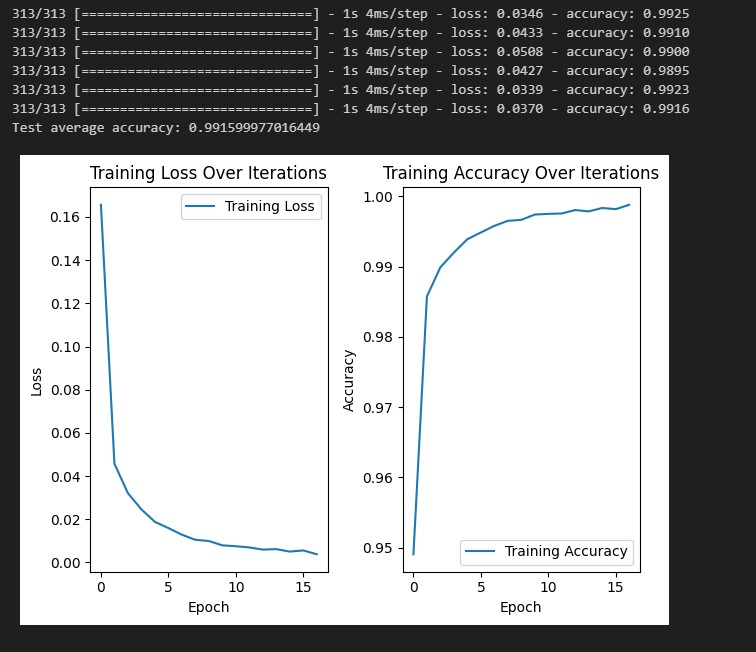

### Test with 6 folds and 17 epochs. Here is also removed a layer of pooling:   
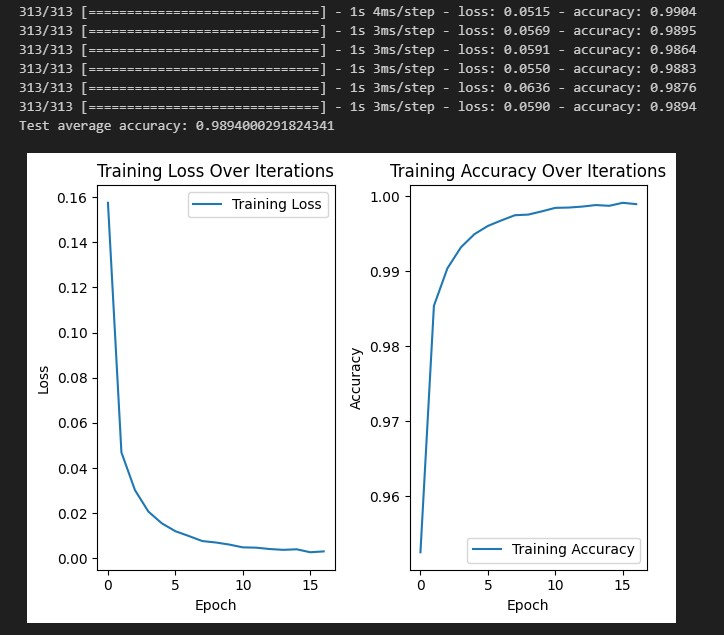

### Test with 3 folds and 17 epochs. Here is also added a extra layer of pooling:   
```
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
```
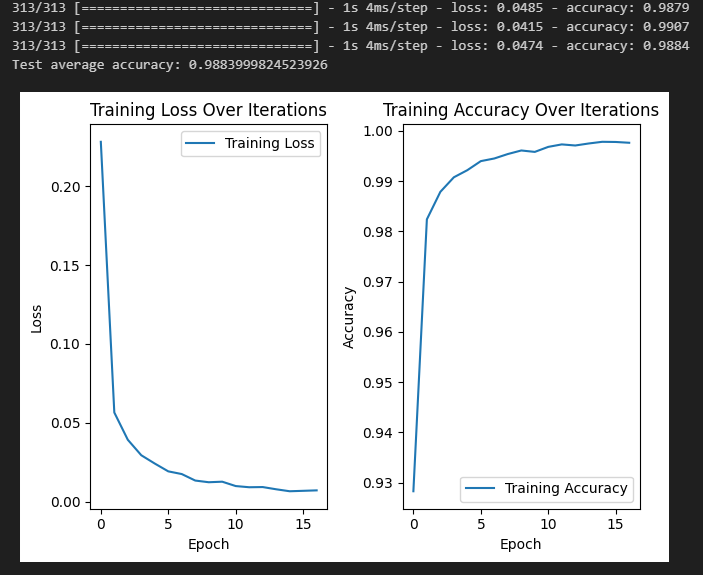

From these test, we can conclude that it is the test with 6 folds and 17 epochs, which gave the best average accuracy score, with a score of ```0.991599977016449```


**Iterations towards the end-goal**
The first thing that supprised us was the did not come  preparred, but need reshaping.

In the first creation of the code we inline the epoch in the model. ```model.fit(X_train_kfold, y_train_kfold, epochs=17, batch_size=64, verbose=0)```. The problem here was creating the plots, so we adjust the epochs to be in a forloop. This could probally be done more smoothly, however this works.

In [4]:
from keras.datasets.mnist import load_data
from keras.utils import plot_model, to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

(X_train, y_train ), (X_test, y_test) = load_data()

# Remove first element
X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((-1 , 28, 28, 1)).astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 3, 3 means pixel... creates a 3x 3 pixels.
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same",activation='relu', input_shape=(28, 28 , 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Plot the model
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

folds = 6
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
test_accuracy = []

train_losses = []
train_accuracies = []


for train, val in kfold.split(X_train, y_train.argmax(1)):

    model = createModel()

    X_train_kfold, x_val_kfold = X_train[train], X_train[val]
    y_train_kfold, y_val_kfold = y_train[train], y_train[val]

    fold_train_losses = []
    fold_train_accuracies = []

    for epoch in range(17): 
        history = model.fit(X_train_kfold, y_train_kfold, epochs=1, batch_size=64, verbose=0)

        fold_train_losses.append(history.history['loss'][0])
        fold_train_accuracies.append(history.history['accuracy'][0])

    train_losses.append(fold_train_losses)
    train_accuracies.append(fold_train_accuracies)


    test_loss, test_accuracy = model.evaluate(X_test, y_test)

avg_accuracy = np.mean(test_accuracy)
print(f'Test average accuracy: {avg_accuracy}')

train_losses = np.array(train_losses)
train_accuracies = np.array(train_accuracies)

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(np.mean(train_losses, axis=0), label='Training Loss')
plt.title('Training Loss Over Iterations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.mean(train_accuracies, axis=0), label='Training Accuracy')
plt.title('Training Accuracy Over Iterations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


**Conclusion**

In this exercise, we worked with CNNs, and specialized a model designed to process data in form of images. 
Through our experiments we could attain a high accuracy on the MNIST dataset using a CNN, by exploring varuiys configurations. The adjustment of folds and pooling layers had an effect og the average accuracy score, and with the average accuracy score and the learning curves, we could determine which approach would be best. Our final result gave a score of: """" and we can observe a decrease in the training loss and increase in accuracy. 


# SWMAL Exercise

## Generalization Error
<details><summary>Description</summary>
In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]), that pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">
</details>

### Qa) On Generalization Error
<details><summary>Description</summary>
Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.
  </details>
<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


  We gave Chat-gpt a link to the graph and the Qa description to see if it could solve the assignment, however we have also explained the terms in our own words underneath. This is the result:

<details><summary>ChatGTP answer</summary>
  1. Training and Generalization Error:
Training Error (Blue Curve): This curve represents the error (loss) on the training dataset as the capacity (complexity) of the model increases. Initially, the error decreases as the model becomes more complex, indicating better fit to the training data.

Generalization Error (Red Curve): This curve represents the error (loss) on an unseen test/validation dataset. It measures how well the model performs on new, unseen data that it wasn't trained on.

2. Underfit and Overfit Zone:
Underfitting (Left Side): When the model's capacity is too low (left side of the graph), it struggles to capture the underlying patterns in the data. Both the training and generalization errors are high. This is a sign of insufficient complexity.

Overfitting (Right Side): As the model's capacity increases, it starts to fit not only the underlying patterns but also the noise in the training data. This leads to a significant drop in training error but an increase in generalization error. The model is now fitting the noise, which is detrimental for unseen data.

3. Optimal Capacity:
Optimal Capacity (Middle Area): The sweet spot in the middle represents the optimal capacity of the model. It's the point where the generalization error is minimized. The model has enough complexity to capture the underlying patterns without overfitting to the noise.
4. Generalization Gap:
Generalization Gap (Vertical Distance): It's the vertical distance between the training error curve and the generalization error curve. It measures the difference in performance between the training and test datasets. A large gap indicates overfitting, while a small gap indicates good generalization.
5. Axes: x/Capacity, y/Error:
x-axis (Capacity): This represents the complexity or capacity of the model. It's a measure of how flexible the model is in capturing intricate patterns in the data.

y-axis (Error): This axis shows the error (loss) associated with the model's predictions. Lower values indicate better performance, while higher values indicate poorer performance.

In summary, Figure 5.3 illustrates the trade-off between the complexity of a model (capacity) and its ability to generalize to new, unseen data. The goal is to find the optimal capacity that minimizes the generalization error, striking a balance between underfitting and overfitting.
</details>




On the graph a the y-axis describes the error amount, aka how often the model makes a wrong or partially incorrect prediction. The x-axis describes the capacity of the model, aka how capable or complex the model is. This can be increased by for example adding more neurons per layer, adding more total layers or switching to a more complex model.  

**training error**
The blue curve is training error. The training error curve describes the error percentage in relation to the capacity/complexity of the training model when used on the training data. Naturally when we increase the power of our model, the model should be able to understand and more patterns in the data. This is however not necnecessarily a good thing which will be elaborated in the overfitting segment.

**Generalization error**
The green curve is the Generalization error. The generalization error describes the error percentage in relation to the capacity/complexity of the training model when used on unseen test data. 

**Underfitting**
Underfitting happens when a model is unable to understand enough of the patterns if any in the training and test data. This results in a higher training- and generalization error. If your model has a high generaliztion and tranning error it could be a sign that you have underfitted your model, and need to increase the complexity of the model. This can be done in many different ways.

**Overfitting**
Overfitting is when a too capable model is being used on a data set. This results in the model finding patterns in the "noise" of the training data that potntionally aren't relevant and therefore result in a higher generalization error. The Training error is typically very low since the very capable model has found all the patterns and more in the training data. If you experience a high generlization error and a very low training error it could be an indication that you need to reduce the capacity of your model, and the model has overcomplicated its understanding of the data. It could also be because there are patterns in the training data which are not present in the test data, so it would be a good idea to also check that you data-split correctly and mix the data.

**Generalization gap**
The generalization gap, is the vertical gap between the training error curve and the generalization curve. This means it describes the size of the difference between the errors that occur when the model is used on the training data and when the model is used on the test data.  It typically increases when the model has been overfitted.

**Optimal Capacity**
The optimal capacity is the perfect complexity for the model where it filters out the noise-patterns and picks up as many of the actual patterns as possible. This results in the training error generalization error and generalization gap being as low as possible. It is what you want to get as close to as possible when fitting you model. 


### Qb A MSE-Epoch/Error Plot
<details><summary>Description</summary>
Next, we look at a SGD model for fitting polynomial, that is _polynomial regression_ similar to what Géron describes in [HOML] ("Polynomial Regression" + "Learning Curves"). 

Review the code below for plotting the RMSE vs. the iteration number or epoch below (three cells, part I/II/III). 

Write a short description of the code, and comment on the important points in the generation of the (R)MSE array.

The training phase output lots of lines like 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
> `epoch= 105, mse_train=1.49, mse_val=2.35`

What is an ___epoch___ and what is `mse_train` and `mse_val`?

NOTE$_1$: the generalization plot figure 5.3 in [DL] (above) and the plots below have different x-axis, and are not to be compared directly!

NOTE$_2$: notice that a 90 degree polynomial is used for the polynomial regression. This is just to produce a model with an extremly high capacity.
</details>

*Part 1:*

The ```GenerateData()``` is used to generate random data points for ```X``` and add some noise to the random variable ```y``` to simulate realworld data. The `y` is a quadratic function, which is this mathimatical function f(x)=ax<sup>2</sup>+bx+c. After the the data is spilt into a training set and a validation set. 

After we create a pipeline which takes the PolynomialFeatures and StandardScaler. The 
After we create a pipeline which takes the PolynomialFeatures and StandardScaler. ```PolynomialFeatures``` is a prepocessor which have to inputs: the degree and the biased. We rotate the features 90 degree and don't include the bias. This is just to produce a model with an extremly high capacity. StandardScaler also a preprocesser, that standardized the featues in the dataset. This is done by removing the mean  and center the feature distribution around zero and after the scales the features variance. So this mean the variance of each feature will be 1.

The we train and validation set are transformed with ```X_train_poly_scaled = poly_scaler.fit_transform(X_train)``` and ``` X_val_poly_scaled   = poly_scaler.transform(X_val)```


*Part 2:*
 
Creates a function call Train. It takes the inputs ```def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False)```. It makes a array of errors for both the validation and train. Then we run a SDGResgresster with only one iteration, where we have a constant learning rate. 

There after we have a for loop we run though each number of epochs, where we fit and predict for both train and validation. TTen we add the MSE for training and validation to the respective error array. if the verbose is set too true we print out each epoch and MSE for training and validation. 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
The `epoch` is the number of training iteration. In each epoch train and validate the set and put it into a array. The `mse_train` is the mean squared error on the training set and it measures how well the it preform in this epoch. The same count for the `mse_val`. 
The output is use to help us monitor the training process and assess how well the model is learning form the data.


*Part 3:*

We find the best epoch using the minimum of our validate errors array. After that we calculate the RMSE for the best preform epoch. Then we plot out this epoch with a arrow. The plot is the epoch in the x-axis and RSME in the y-axis. A horizontal dotted line indicates the RMSE of the best model. The best model is the one with the lowest validation RMSE. This model will follow the underlying trend in the data without fitting too closely to the noise and is the best to unseen data. 

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


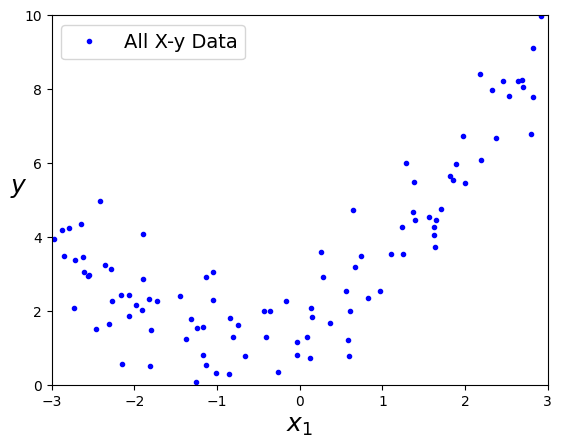

OK


In [3]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

In [4]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           tol=-float(0),
                           random_state=42)

    for epoch in range(n_epochs):
        
        sgd_reg.fit(X_train, y_train)
        
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

  epoch= 127, mse_train=1.17, mse_val=1.94
  epoch= 128, mse_train=1.16, mse_val=1.92
  epoch= 129, mse_train=1.15, mse_val=1.91
  epoch= 130, mse_train=1.14, mse_val=1.89
  epoch= 131, mse_train=1.13, mse_val=1.88
  epoch= 132, mse_train=1.12, mse_val=1.87
  epoch= 133, mse_train=1.11, mse_val=1.85
  epoch= 134, mse_train=1.10, mse_val=1.84
  epoch= 135, mse_train=1.09, mse_val=1.83
  epoch= 136, mse_train=1.08, mse_val=1.81
  epoch= 137, mse_train=1.07, mse_val=1.80
  epoch= 138, mse_train=1.06, mse_val=1.79
  epoch= 139, mse_train=1.06, mse_val=1.78
  epoch= 140, mse_train=1.05, mse_val=1.77
  epoch= 141, mse_train=1.04, mse_val=1.76
  epoch= 142, mse_train=1.03, mse_val=1.74
  epoch= 143, mse_train=1.02, mse_val=1.73
  epoch= 144, mse_train=1.02, mse_val=1.72
  epoch= 145, mse_train=1.01, mse_val=1.71
  epoch= 146, mse_train=1.00, mse_val=1.70
  epoch= 147, mse_train=0.99, mse_val=1.69
  epoch= 148, mse_train=0.99, mse_val=1.68
  epoch= 149, mse_train=0.98, mse_val=1.67
  epoch= 15

c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

  epoch= 236, mse_train=0.68, mse_val=1.35
  epoch= 237, mse_train=0.68, mse_val=1.35
  epoch= 238, mse_train=0.68, mse_val=1.35
  epoch= 239, mse_train=0.68, mse_val=1.35
  epoch= 240, mse_train=0.68, mse_val=1.35
  epoch= 241, mse_train=0.68, mse_val=1.35
  epoch= 242, mse_train=0.67, mse_val=1.35
  epoch= 243, mse_train=0.67, mse_val=1.35
  epoch= 244, mse_train=0.67, mse_val=1.35
  epoch= 245, mse_train=0.67, mse_val=1.35
  epoch= 246, mse_train=0.67, mse_val=1.35
  epoch= 247, mse_train=0.67, mse_val=1.35
  epoch= 248, mse_train=0.67, mse_val=1.35
  epoch= 249, mse_train=0.67, mse_val=1.35
  epoch= 250, mse_train=0.66, mse_val=1.35
  epoch= 251, mse_train=0.66, mse_val=1.35
  epoch= 252, mse_train=0.66, mse_val=1.35
  epoch= 253, mse_train=0.66, mse_val=1.36
  epoch= 254, mse_train=0.66, mse_val=1.36
  epoch= 255, mse_train=0.66, mse_val=1.36
  epoch= 256, mse_train=0.66, mse_val=1.36
  epoch= 257, mse_train=0.66, mse_val=1.36
  epoch= 258, mse_train=0.65, mse_val=1.36
  epoch= 25

c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

  epoch= 350, mse_train=0.58, mse_val=1.54
  epoch= 351, mse_train=0.58, mse_val=1.54
  epoch= 352, mse_train=0.58, mse_val=1.55
  epoch= 353, mse_train=0.58, mse_val=1.55
  epoch= 354, mse_train=0.58, mse_val=1.55
  epoch= 355, mse_train=0.58, mse_val=1.55
  epoch= 356, mse_train=0.58, mse_val=1.56
  epoch= 357, mse_train=0.58, mse_val=1.56
  epoch= 358, mse_train=0.58, mse_val=1.56
  epoch= 359, mse_train=0.58, mse_val=1.57
  epoch= 360, mse_train=0.58, mse_val=1.57
  epoch= 361, mse_train=0.58, mse_val=1.57
  epoch= 362, mse_train=0.58, mse_val=1.57
  epoch= 363, mse_train=0.58, mse_val=1.58
  epoch= 364, mse_train=0.58, mse_val=1.58
  epoch= 365, mse_train=0.58, mse_val=1.58
  epoch= 366, mse_train=0.58, mse_val=1.59
  epoch= 367, mse_train=0.58, mse_val=1.59
  epoch= 368, mse_train=0.58, mse_val=1.59
  epoch= 369, mse_train=0.58, mse_val=1.59
  epoch= 370, mse_train=0.57, mse_val=1.60
  epoch= 371, mse_train=0.57, mse_val=1.60
  epoch= 372, mse_train=0.57, mse_val=1.60
  epoch= 37

c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

  epoch= 472, mse_train=0.54, mse_val=1.91
  epoch= 473, mse_train=0.54, mse_val=1.91
  epoch= 474, mse_train=0.54, mse_val=1.91
  epoch= 475, mse_train=0.54, mse_val=1.92
  epoch= 476, mse_train=0.54, mse_val=1.92
  epoch= 477, mse_train=0.54, mse_val=1.92
  epoch= 478, mse_train=0.54, mse_val=1.92
  epoch= 479, mse_train=0.54, mse_val=1.93
  epoch= 480, mse_train=0.54, mse_val=1.93
  epoch= 481, mse_train=0.54, mse_val=1.93
  epoch= 482, mse_train=0.54, mse_val=1.94
  epoch= 483, mse_train=0.54, mse_val=1.94
  epoch= 484, mse_train=0.54, mse_val=1.94
  epoch= 485, mse_train=0.54, mse_val=1.95
  epoch= 486, mse_train=0.54, mse_val=1.95
  epoch= 487, mse_train=0.54, mse_val=1.95
  epoch= 488, mse_train=0.54, mse_val=1.95
  epoch= 489, mse_train=0.54, mse_val=1.96
  epoch= 490, mse_train=0.54, mse_val=1.96
  epoch= 491, mse_train=0.54, mse_val=1.96
  epoch= 492, mse_train=0.54, mse_val=1.97
  epoch= 493, mse_train=0.54, mse_val=1.97
  epoch= 494, mse_train=0.54, mse_val=1.97
  epoch= 49

c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

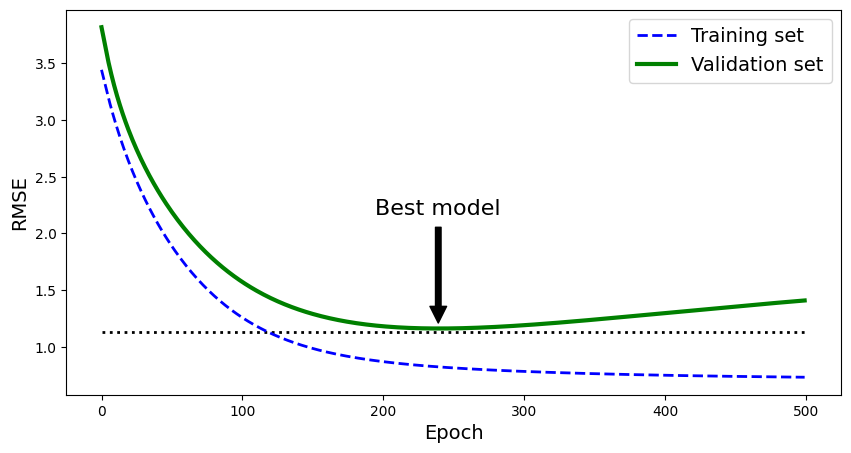

OK


In [5]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

### Qc)  Early Stopping
<details><summary>Description</summary>
How would you implement ___early stopping___, in the code above? 

Write an explanation of the early stopping concept...that is, just write some pseudo code that 'implements' the early stopping. 

OPTIONAL: also implement your early stopping pseudo code in Python, and get it to work with the code above (and not just flipping the hyperparameter to `early_stopping=True` on the `SGDRegressor`).
</details>


For implementing early_stopping i would before the for loop add two values. One for the model and one for the best model. Inside the for loop I would check if this iteration of validation error is better the the best validataion error. This means this iteration is less than the current best validation error. Then i would add a check when the value of the this iteration becomes bigger than the best value, then break.  

In [ ]:
best_val_error = float('inf')
best_model = None

#For loop here
    
    if val_error < best_val_error:
        best_val_error = val_error
        best_model = clone(sgd_reg)
    
    # Check for early stopping condition
    if val_error > best_val_error:
        print(f"Early stopping at epoch {epoch}")
        break

### Qd) Explain the Polynomial RMSE-Capacity plot
<details><summary>Description</summary>
Now we revisit the concepts from `capacity_under_overfitting.ipynb` notebook and the polynomial fitting with a given capacity (polynomial degree).

Peek into the cell below (code similar to what we saw in `capacity_under_overfitting.ipynb`), and explain the generated RMSE-Capacity plot. Why does the _training error_ keep dropping, while the _CV-error_ drops until around capacity 3, and then begin to rise again?

What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.
</details>



In [ ]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

# SWMAL Exercise

<details>
## Hyperparameters and Gridsearch 

When instantiating a Scikit-learn model in python most or all constructor parameters have _default_ values. These values are not part of the internal model and are hence called ___hyperparameters___---in contrast to _normal_ model parameters, for example the neuron weights, $\mathbf w$, for an `MLP` model.

### Manual Tuning Hyperparameters

Below is an example of the python constructor for the support-vector classifier `sklearn.svm.SVC`, with say the `kernel` hyperparameter having the default value `'rbf'`. If you should choose, what would you set it to other than `'rbf'`? 

```python
class sklearn.svm.SVC(
    C=1.0, 
    kernel=’rbf’, 
    degree=3,
    gamma=’auto_deprecated’, 
    coef0=0.0, 
    shrinking=True, 
    probability=False, 
    tol=0.001, 
    cache_size=200, 
    class_weight=None, 
    verbose=False, 
    max_iter=-1, 
    decision_function_shape=’ovr’, 
    random_state=None
  )
```  

The default values might be a sensible general starting point, but for your data, you might want to optimize the hyperparameters to yield a better result. 

To be able to set `kernel` to a sensible value you need to go into the documentation for the `SVC` and understand what the kernel parameter represents, and what values it can be set to, and you need to understand the consequences of setting `kernel` to something different than the default...and the story repeats for every other hyperparameter!

### Brute Force  Search

An alternative to this structured, but time-consuming approach, is just to __brute-force__ a search of interesting hyperparameters, and  choose the 'best' parameters according to a fit-predict and some score, say 'f1'. 

<img src="https://itundervisning.ase.au.dk/SWMAL/L09/Figs/gridsearch.png"  alt="WARNING: could not get image from server."  style="width:350px">
<small><em>
    <center> Conceptual graphical view of grid search for two distinct hyperparameters. </center> 
    <center> Notice that you would normally search hyperparameters like `alpha` with an exponential range, say [0.01, 0.1, 1, 10] or similar.</center>
</em></small>

Now, you just pick out some hyperparameters, that you figure are important, set them to a suitable range, say

```python
    'kernel':('linear', 'rbf'), 
    'C':[1, 10]
```
and fire up a full (grid) search on this hyperparameter set, that will try out all your specified combination of `kernel` and `C` for the model, and then prints the hyperparameter set with the highest score...

The demo code below sets up some of our well known 'hello-world' data and then run a _grid search_ on a particular model, here a _support-vector classifier_ (SVC)

Other models and datasets  ('mnist', 'iris', 'moon') can also be examined.
</details>

### Qa Explain GridSearchCV
<details><summary>Description</summary>
There are two code cells below: 1) function setup, 2) the actual grid-search.

Review the code cells and write a __short__ summary. Mainly focus on __cell 2__, but dig into cell 1 if you find it interesting (notice the use of local-function, a nifty feature in python).
  
In detail, examine the lines:  
  
```python
grid_tuned = GridSearchCV(model, tuning_parameters, ..
grid_tuned.fit(X_train, y_train)
..
FullReport(grid_tuned , X_test, y_test, time_gridsearch)
```
and write a short description of how the `GridSeachCV` works: explain how the search parameter set is created and the overall search mechanism is functioning (without going into too much detail).

What role does the parameter `scoring='f1_micro'` play in the `GridSearchCV`, and what does `n_jobs=-1` mean? 
</details>

Start with setting up the data with the function ```LoadAndSetUpData('iris')```, which load the dataset based on a string. It can load different data 'iris', 'moon', or 'mnist'. Inside the function it check the the data is valid and splits it into train and test set. 

Afterwards we set up the search parameters as a support vecotr machine classifier with the value ```gamma=0.001```. The gamma influence the decision boundary, so a lower gamma means it is more sensivtive to individual data points. 

We specifi some of the hyperparameter for the (full) grid search. Here we try out the specified combination of `kernel` and `C` for the model , and then prints the hyperparameter set with the highest score. `kernel` specifies that the grid search will use two different kernel types. The ``rbf` stand for radial basis function. `C` defines the values for the regularization parameter. The requlaization is used elude overfitting, because model learns the training data too well and struggles to generalize to new, unseen data.

The setting `CV` stands for how many cross-validation. `VERBOSE` is used for `observe` the training progress for each epoch. `verbos=0` will show you nothing (silent).

```GridSearchCV(model, tuning_parameters, cv=CV, scoring='f1_micro', verbose=VERBOSE, n_jobs=-1)``` creates a gridsearch object and inputs are the explaned parameter. It uses a f1_mirco as a score and it calculates the F1 score for each class, then computes the average, giving equal weight to each class. The last hyperparameter is uses all available processors for parallel computing (n_jobs=-1)

In [1]:
from time import time
import numpy as np
import sys

from sklearn import svm
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn import datasets

import sys,os
sys.path.append(os.path.expanduser('../'))
from libitmal import dataloaders as itmaldataloaders # Needed for load of iris, moon and mnist

currmode="N/A" # GLOBAL var!

def SearchReport(model): 
    
    def GetBestModelCTOR(model, best_params):
        def GetParams(best_params):
            ret_str=""          
            for key in sorted(best_params):
                value = best_params[key]
                temp_str = "'" if str(type(value))=="<class 'str'>" else ""
                if len(ret_str)>0:
                    ret_str += ','
                ret_str += f'{key}={temp_str}{value}{temp_str}'  
            return ret_str          
        try:
            param_str = GetParams(best_params)
            return type(model).__name__ + '(' + param_str + ')' 
        except:
            return "N/A(1)"
        
    print("\nBest model set found on train set:")
    print()
    print(f"\tbest parameters={model.best_params_}")
    print(f"\tbest '{model.scoring}' score={model.best_score_}")
    print(f"\tbest index={model.best_index_}")
    print()
    print(f"Best estimator CTOR:")
    print(f"\t{model.best_estimator_}")
    print()
    try:
        print(f"Grid scores ('{model.scoring}') on development set:")
        means = model.cv_results_['mean_test_score']
        stds  = model.cv_results_['std_test_score']
        i=0
        for mean, std, params in zip(means, stds, model.cv_results_['params']):
            print("\t[%2d]: %0.3f (+/-%0.03f) for %r" % (i, mean, std * 2, params))
            i += 1
    except:
        print("WARNING: the random search do not provide means/stds")
    
    global currmode                
    assert "f1_micro"==str(model.scoring), f"come on, we need to fix the scoring to be able to compare model-fits! Your scoreing={str(model.scoring)}...remember to add scoring='f1_micro' to the search"   
    return f"best: dat={currmode}, score={model.best_score_:0.5f}, model={GetBestModelCTOR(model.estimator,model.best_params_)}", model.best_estimator_ 

def ClassificationReport(model, X_test, y_test, target_names=None):
    assert X_test.shape[0]==y_test.shape[0]
    print("\nDetailed classification report:")
    print("\tThe model is trained on the full development set.")
    print("\tThe scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, model.predict(X_test)                 
    print(classification_report(y_true, y_pred, target_names=target_names))
    print()
    
def FullReport(model, X_test, y_test, t):
    print(f"SEARCH TIME: {t:0.2f} sec")
    beststr, bestmodel = SearchReport(model)
    ClassificationReport(model, X_test, y_test)    
    print(f"CTOR for best model: {bestmodel}\n")
    print(f"{beststr}\n")
    return beststr, bestmodel
    
def LoadAndSetupData(mode, test_size=0.3):
    assert test_size>=0.0 and test_size<=1.0
    
    def ShapeToString(Z):
        n = Z.ndim
        s = "("
        for i in range(n):
            s += f"{Z.shape[i]:5d}"
            if i+1!=n:
                s += ";"
        return s+")"

    global currmode
    currmode=mode
    print(f"DATA: {currmode}..")
    
    if mode=='moon':
        X, y = itmaldataloaders.MOON_GetDataSet(n_samples=5000, noise=0.2)
        itmaldataloaders.MOON_Plot(X, y)
    elif mode=='mnist':
        X, y = itmaldataloaders.MNIST_GetDataSet(load_mode=0)
        if X.ndim==3:
            X=np.reshape(X, (X.shape[0], -1))
    elif mode=='iris':
        X, y = itmaldataloaders.IRIS_GetDataSet()
    else:
        raise ValueError(f"could not load data for that particular mode='{mode}', only 'moon'/'mnist'/'iris' supported")
        
    print(f'  org. data:  X.shape      ={ShapeToString(X)}, y.shape      ={ShapeToString(y)}')

    assert X.ndim==2
    assert X.shape[0]==y.shape[0]
    assert y.ndim==1 or (y.ndim==2 and y.shape[1]==0)    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0, shuffle=True
    )
    
    print(f'  train data: X_train.shape={ShapeToString(X_train)}, y_train.shape={ShapeToString(y_train)}')
    print(f'  test data:  X_test.shape ={ShapeToString(X_test)}, y_test.shape ={ShapeToString(y_test)}')
    print()
    
    return X_train, X_test, y_train, y_test

def TryKerasImport(verbose=True):
    
    kerasok = True
    try:
        import keras as keras_try
    except:
        kerasok = False

    tensorflowkerasok = True
    try:
        import tensorflow.keras as tensorflowkeras_try
    except:
        tensorflowkerasok = False
        
    ok = kerasok or tensorflowkerasok
    
    if not ok and verbose:
        if not kerasok:
            print("WARNING: importing 'keras' failed", file=sys.stderr)
        if not tensorflowkerasok:
            print("WARNING: importing 'tensorflow.keras' failed", file=sys.stderr)

    return ok
    
print(f"OK(function setup" + ("" if TryKerasImport() else ", hope MNIST loads works because it seems you miss the installation of Keras or Tensorflow!") + ")")

OK(function setup)


In [2]:
# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = svm.SVC(
    gamma=0.001
)  # NOTE: gamma="scale" does *not work in older Scikit-learn frameworks,
# FIX:  replace with model = svm.SVC(gamma=0.001)

tuning_parameters = {
    'kernel': ('linear', 'rbf'), 
    'C': [0.1, 1, 10]
}

CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

SEARCH TIME: 1.43 sec

Best model set found on train set:

	best parameters={'C': 1, 'kernel': 'linear'}
	best 'f1_micro' score=0.9714285714285715
	best index=2

Best estimator CTOR:
	SVC(C=1, gamma=0.001, kernel='linear')

Grid scores ('f1_micro') on development set:
	[ 0]: 0.962 (+/-0.093) for {'C': 0.1, 'kernel': 'linear'}
	[ 1]: 0.371 (+/-0.038) for {'C': 0.1, 'kernel': 'rbf'}
	[ 2]: 0.971 (+/-0.047) for {'C': 1, 'kernel': 'linear'}
	[ 3]: 0.695 (+/-0.047) for {'C': 1, 'kernel': 'rbf'}
	[ 4]: 0.952 (+/-0.085) for {'C': 10, 'kernel': 'linear'}
	[ 5]: 0.924 (+/-0.097) for {'C': 10, 'kernel': 'rbf'}

Detailed classification report:
	The model is trained on the full development set.
	The scores are computed on the full evaluation set.

              precision    recall  f1-score  

### Qb Hyperparameter Grid Search using an SDG classifier
<details><summary>Description</summary>
Now, replace the `svm.SVC` model with an `SGDClassifier` and a suitable set of the hyperparameters for that model.

You need at least four or five different hyperparameters from the `SGDClassifier` in the search-space before it begins to take considerable compute time doing the full grid search.

So, repeat the search with the `SGDClassifier`, and be sure to add enough hyperparameters to the grid-search, such that the search takes a considerable time to run, that is a couple of minutes or up to some hours..
</details>

We have now replaced the `svm.SVC` model with an `SGDClassifier` and changed the hyperparameter for the model. We know uses the parameter different loss function. We also put max number of iteration and regularization for reduce overfitting, however also less flexible model. eta0 is the initial learning rate. Penalty is the detementain the type of regulaization.
```
tuning_parameters = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'],
    'max_iter': [300, 900, 1400],
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'power_t': [0.1, 0.5],
    'early_stopping': [False],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [5, 10, 20],
}
```

as we can observe the best parameter was

```
Best estimator CTOR:
	SGDClassifier(alpha=0.001, eta0=0.01, loss='perceptron', max_iter=300,
              penalty='l1', random_state=42)
```

In [7]:
from sklearn.linear_model import SGDClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = SGDClassifier(
    loss='hinge',
    random_state=42
)  

tuning_parameters = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'],
    'max_iter': [300, 900, 1400],
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'power_t': [0.1, 0.5],
    'early_stopping': [False],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [5, 10, 20],
}


CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

SEARCH TIME: 11.04 sec

Best model set found on train set:

	best parameters={'alpha': 0.001, 'early_stopping': False, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 300, 'n_iter_no_change': 20, 'penalty': 'l1', 'power_t': 0.1, 'validation_fraction': 0.1}
	best 'f1_micro' score=0.9904761904761905
	best index=1672

Best estimator CTOR:
	SGDClassifier(alpha=0.001, eta0=0.01, loss='perceptron', max_iter=300,
              n_iter_no_change=20, penalty='l1', power_t=0.1, random_state=42)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.905 (+/-0.085) for {'alpha': 0.0001, 'early_stopping': False, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 300, 'n_iter_no_change': 5, 'penalty': 'l1', 'power_t': 0.1, 'validation_fraction': 0

### Qc Hyperparameter Random  Search using an SDG classifier
<details><summary>Description</summary>
Now, add code to run a `RandomizedSearchCV` instead.

<img src="https://itundervisning.ase.au.dk/SWMAL/L09/Figs/randomsearch.png" alt="WARNING: could not get image from server."  style="width:350px" >
<small><em>
    <center> Conceptual graphical view of randomized search for two distinct hyperparameters. </center> 
</em></small>

Use these default parameters for the random search, similar to the default parameters for the grid search

```python
random_tuned = RandomizedSearchCV(
    model, 
    tuning_parameters, 
    n_iter=20, 
    random_state=42, 
    cv=CV, 
    scoring='f1_micro', 
    verbose=VERBOSE, 
    n_jobs=-1
)
```

but with the two new parameters, `n_iter` and `random_state` added. Since the search-type is now random, the `random_state` gives sense, but essential to random search is the new `n_tier` parameter.

So: investigate the `n_iter` parameter...in code and write a conceptual explanation  in text.

Comparison of time (seconds) to complete `GridSearch` versus `RandomizedSearchCV`, does not necessarily give any sense, if your grid search completes in a few seconds (as for the iris tiny-data). You need a search that runs for minutes, hours, or days.

But you could compare the best-tuned parameter set and best scoring for the two methods. Is the random search best model close to the grid search?  
</details>


We have now replaced the `GridSearchCV` with `RandomizedSearchCV`. The `n_iter` parameter represents the number of iterations over the training dataset. It allows the model to learn from the training data and avoids excessive training times.

We have trained this with a lot of hyperparameters; however, it did not take that long to train. However, when we tried to add one more hyperparameter, it took such a long time that we gave up.

The results we obtained for GridSearch are as follows:
```best: dat=iris, score=0.99048, model=SGDClassifier(alpha=0.001,early_stopping=False,eta0=0.01,learning_rate='optimal',loss='perceptron',max_iter=300,n_iter_no_change=20,penalty='l1',power_t=0.1,validation_fraction=0.1)```
SEARCH TIME: 11.04 sec

And for `RandomizedSearch`:
SEARCH TIME: 0.08 sec
```best: dat=iris, score=0.96190, model=SGDClassifier(alpha=0.01,early_stopping=False,eta0=0.1,learning_rate='optimal',loss='hinge',max_iter=1400,n_iter_no_change=5,penalty='l1',power_t=0.5,validation_fraction=0.2)```

What we can obeserve is that GridSearch is diffently a better result than RandomGridSearch. It was two different models and iteration that was best for each model. There is a long way from 0.96 to 0.99, so random search best model  is not close to the grid search. 



In [8]:
from sklearn.model_selection import RandomizedSearchCV

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = SGDClassifier(
    loss='hinge',
    random_state=42
)  

tuning_parameters = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'],
    'max_iter': [300, 900, 1400],
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'power_t': [0.1, 0.5],
    'early_stopping': [False],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [5, 10, 20],
}

CV = 5
VERBOSE = 0

# Run RandomizedSearchCV for the model
grid_tuned = RandomizedSearchCV(model, 
                                tuning_parameters, 
                                n_iter=20, 
                                random_state=42, 
                                cv=CV, 
                                scoring='f1_micro', 
                                verbose=VERBOSE, 
                                n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

SEARCH TIME: 0.14 sec

Best model set found on train set:

	best parameters={'validation_fraction': 0.2, 'power_t': 0.5, 'penalty': 'l1', 'n_iter_no_change': 5, 'max_iter': 1400, 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': 0.1, 'early_stopping': False, 'alpha': 0.01}
	best 'f1_micro' score=0.9619047619047618
	best index=1

Best estimator CTOR:
	SGDClassifier(alpha=0.01, eta0=0.1, max_iter=1400, penalty='l1',
              random_state=42, validation_fraction=0.2)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.905 (+/-0.104) for {'validation_fraction': 0.1, 'power_t': 0.5, 'penalty': 'l2', 'n_iter_no_change': 5, 'max_iter': 300, 'loss': 'perceptron', 'learning_rate': 'invscaling', 'eta0': 0.01, 'early_stopping': False, 'alpha': 0.01}
	[ 1]: 0.962 (+/-0.038) for {'v

## Qd MNIST Search Quest II
<details><summary>Description</summary>
Finally, a search-quest competition: __who can find the best model+hyperparameters for the MNIST dataset?__

You change to the MNIST data by calling `LoadAndSetupData('mnist')`, and this is a completely other ball-game that the iris _tiny-data_: it's much larger (but still far from _big-data_)!

* You might opt for the exhaustive grid search, or use the faster but-less optimal random search...your choice. 

* You are free to pick any classifier in Scikit-learn, even algorithms we have not discussed yet---__except Neural Networks and KNeighborsClassifier!__. 

* Keep the score function at `f1_micro`, otherwise, we will be comparing 'æbler og pærer'. 

* And, you may also want to scale your input data for some models to perform better.

* __REMEMBER__, DO NOT USE any Neural Network models. This also means not to use any `Keras` or `Tensorflow` models...since they outperform most other models, and there are also too many examples on the internet to cut-and-paste from!

Check your result by printing the first _return_ value from `FullReport()` 
```python 
b1, m1 = FullReport(random_tuned , X_test, y_test, time_randomsearch)
print(b1)
```
that will display a result like
```
best: dat=mnist, score=0.90780, model=SGDClassifier(alpha=1.0,eta0=0.0001,learning_rate='invscaling')
```
and paste your currently best model into the message box, for ITMAL group 09 like
```
Grp09: best: dat=mnist, score=0.90780, model=SGDClassifier(alpha=1.0,eta0=0.0001,learning_rate='invscaling')

Grp09: CTOR for best model: SGDClassifier(alpha=1.0, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
```
              
on Brightspace: "L09: Regularisering, optimering og søgning" | "Qd MNIST Search Quest"

> https://itundervisning.ase.au.dk/itmal_quest/index.php

and, check if your score (for MNIST) is better than the currently best score. Republish if you get a better score than your own previously best. Deadline for submission of scores is the same as the deadline for the O3 journal handin.

Remember to provide an ITMAL group name manually, so we can identify a winner: the 1. st price is  cake! 

For the journal hand-in, report your progress in scoring choosing different models, hyperparameters to search and how you might need to preprocess your data...and note, that the journal will not be accepted unless it contains information about Your results published on the Brightspace 'Search Quest II' page!
</details>


```best: dat=mnist, score=0.96771, model=RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=5,n_estimators=200)```

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'mnist')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = RandomForestClassifier(
    random_state=42
)  

tuning_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'oob_score': [True, False],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
    'warm_start': [True, False],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
grid_tuned = RandomizedSearchCV(model, 
                                tuning_parameters, 
                                n_iter=200, 
                                random_state=42, 
                                cv=CV, 
                                scoring='f1_micro', 
                                verbose=VERBOSE, 
                                n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: mnist..
  org. data:  X.shape      =(70000;  784), y.shape      =(70000)
  train data: X_train.shape=(49000;  784), y_train.shape=(49000)
  test data:  X_test.shape =(21000;  784), y_test.shape =(21000)



c:\Users\Bjarke\source\repos\Valgfag\mal\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Bjarke\source\repos\Valgfag\mal\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Bjarke\source\repos\Valgfag\mal\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Bjarke\source\repos\Valgfag\mal\Lib\site-packages\s

SEARCH TIME: 622.86 sec

Best model set found on train set:

	best parameters={'warm_start': False, 'oob_score': True, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'class_weight': None, 'ccp_alpha': 0.0, 'bootstrap': True}
	best 'f1_micro' score=0.9627142857142857
	best index=84

Best estimator CTOR:
	RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_split=5, oob_score=True, random_state=42)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.561 (+/-0.019) for {'warm_start': True, 'oob_score': False, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': 0.2, 'bootstrap': True}
	[ 1]: 0.765 (+/-0.008) for {'wa

**Conclusion**
There have been made several adjustments, such as increasing the n-iter and decreasing, fiddling with tuning parameters: max-depths

# SWMAL Exercise

## Advanced CNN using Roboflow

Read the web page 'How to Train YOLOv8 Object Detection on a Custom Dataset' 

> https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/

Then create your own Roboflow project, with some data of your choice found on the site using

> https://universe.roboflow.com/

and clone an existing project. The Roboflow 'pipeline'<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) includes many steps

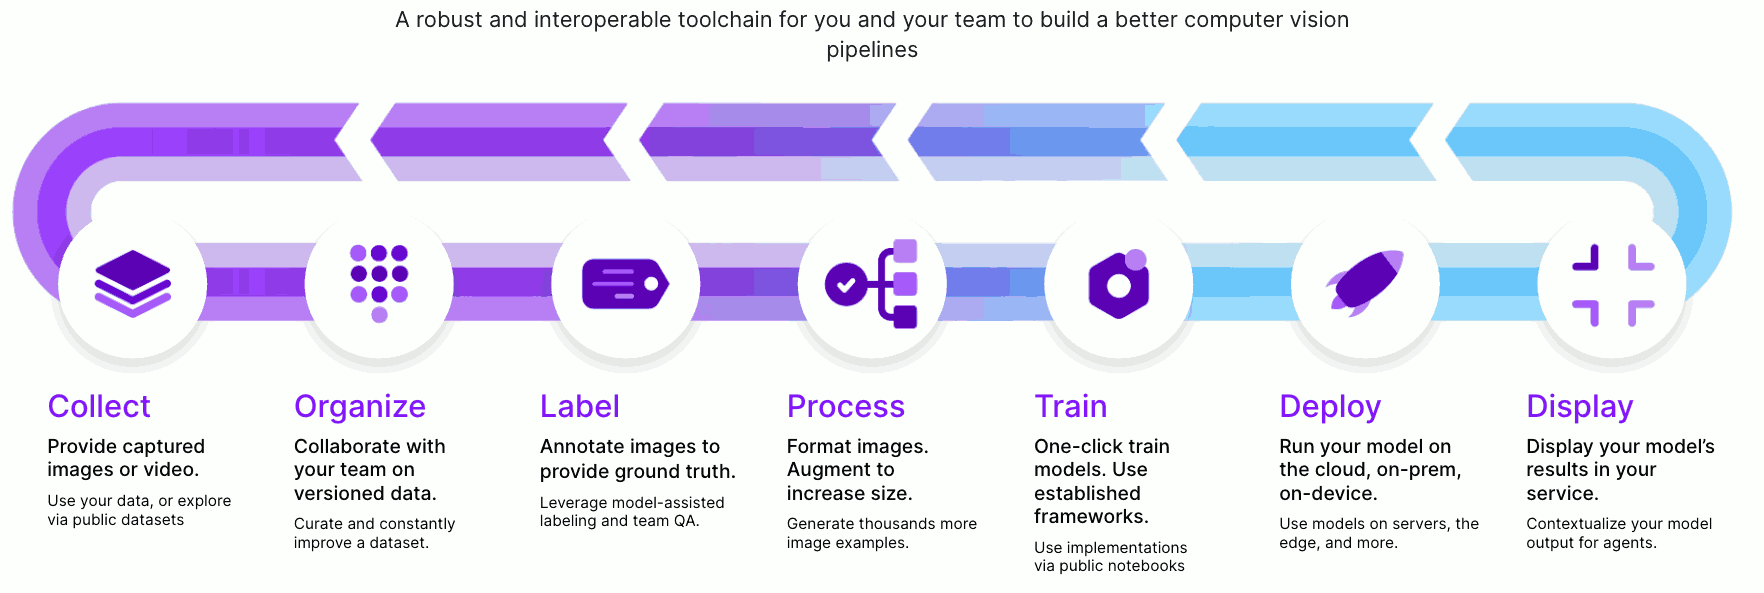

here you only want to look into the _process_ and _train_ steps and take a peek into the _collect_, _organize_ and _labelling_ step, which is normally the most time-consuming part of any ML project.

The current computer vision/ML projects ohn Roboflow include object detection, classification, instance segmentation and semantic segmentation, and you are free to choose between the different computer vision-related concepts, but object detection and classification would probably be the best choice for this journal (instance and semantic segmentation are highly complicated processes.)

Train and test a model and make documentation of the process for the journal, using images, and learning graphs. etc. from the site. 

(Notice, that there is no obvious way of getting hands-on any code behind the 'pipeline' in Roboflow, if, say you want to elaborate on the Yolov models on your own computer.)

<a name="cite_note-1"></a>[1][^](#cite_ref-1)  <span style="font-family:'Courier New'">https://2486075003-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F-M6S9nPJhEX9FYH6clfW%2Fuploads%2FfHpPTWNdCVR9qHQDeskF%2FScreen%20Shot%202022-08-24%20at%2012.35.36%20PM.png?alt=media&token=623927fe-3099-4ccd-8aaa-890bf5c0b03b</span>

In [1]:
# TODO: goto Roboflow, and create a CNN project...

REVISIONS||
:-|:-
2023-04-10| CEF, initial.